# Análisis de Superposición Espacial

Este notebook realiza un análisis de superposición espacial entre:
- **GeoJSON**: `context/unidades_proyecto_descarga.geojson`
- **Shapefile**: `context/ZONAS SICOC.shp`

El objetivo es identificar qué datos del GeoJSON se encuentran sobre cada polígono del shapefile.

## 1. Importar Librerías Necesarias

In [76]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Configuración para mejorar la visualización
plt.rcParams['figure.figsize'] = (15, 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Cargar Datos GeoJSON

In [77]:
# Cargar el archivo GeoJSON
geojson_path = Path("context/unidades_proyecto_descarga.geojson")
gdf_unidades = gpd.read_file(geojson_path)

print(f"✓ GeoJSON cargado correctamente")
print(f"  - Número de registros: {len(gdf_unidades)}")
print(f"  - CRS: {gdf_unidades.crs}")
print(f"  - Tipo de geometría: {gdf_unidades.geometry.type.unique()}")
print(f"\nColumnas disponibles:")
print(gdf_unidades.columns.tolist())

✓ GeoJSON cargado correctamente
  - Número de registros: 1246
  - CRS: EPSG:4326
  - Tipo de geometría: ['Point' 'LineString' 'MultiLineString' 'GeometryCollection']

Columnas disponibles:
['upid', 'has_valid_geometry', 'nombre_up', 'comuna_corregimiento', 'barrio_vereda', 'estado', 'direccion', 'ano', 'presupuesto_base', 'presupuesto_total_up', 'avance_obra', 'bpin', 'tipo_intervencion', 'clase_obra', 'nombre_centro_gestor', 'centro_gestor', 'tipo_equipamiento', 'fuente_financiacion', 'geometry']


In [78]:
# Vista previa de los primeros registros del GeoJSON
gdf_unidades.head()

,upid,has_valid_geometry,nombre_up,comuna_corregimiento,barrio_vereda,estado,direccion,ano,presupuesto_base,presupuesto_total_up,avance_obra,bpin,tipo_intervencion,clase_obra,nombre_centro_gestor,centro_gestor,tipo_equipamiento,fuente_financiacion,geometry
0,UNP-10,True,Parque de Versalles,COMUNA 02,Versalles,En alistamiento,Avenida 5 Norte con calle 23.,2025,77823158,None,0.0,2.147484e+09,Adecuaciones y mantenimientos,None,Departamento Administrativo de Gestión del Med...,None,Parques y zonas verdes,Recursos propios,POINT (-76.52646 3.46473)
1,UNP-100,True,Monumentos Benjamín Herrera,COMUNA 03,San Pedro,Finalizado,Avenida Colombia entre Calles 12 y 13 al Marge...,2024,42820851,None,100.0,2.147484e+09,Adecuaciones y mantenimientos,None,Secretaría de Cultura,None,Infraestructura cultural,Recursos propios,POINT (-76.53109 3.45605)
2,UNP-1000,False,INSTITUCION EDUCATIVA TECNICO COMERCIAL JOSE M...,COMUNA 11,LA SELVA,Finalizado,None,2024,783082000,None,100.0,2.600534e+07,Adecuaciones y mantenimientos,None,Secretaría de Educación,None,Institución Educativa,Recursos propios,POINT (0 0)
3,UNP-1001,False,INSTITUCION EDUCATIVA ALBERTO CARVAJAL BORRERO,COMUNA 10,EL TRÉBOL,Finalizado,None,2024,783082000,None,100.0,2.600534e+07,Adecuaciones y mantenimientos,None,Secretaría de Educación,None,Institución Educativa,Recursos propios,POINT (0 0)
4,UNP-1002,False,INSTITUCION EDUCATIVA LA BUITRERA,COMUNA 08,K 3 CORREGIMIENTO LA BUITRERA,Finalizado,None,2024,783082000,None,100.0,2.600534e+07,Adecuaciones y mantenimientos,None,Secretaría de Educación,None,Institución Educativa,Recursos propios,POINT (0 0)


## 3. Cargar Shapefile (ZONAS SICOC)

In [79]:
# Cargar el shapefile ZONAS SICOC
shapefile_path = Path("context/ZONAS SICOC.shp")
gdf_zonas = gpd.read_file(shapefile_path)

print(f"✓ Shapefile cargado correctamente")
print(f"  - Número de polígonos: {len(gdf_zonas)}")
print(f"  - CRS: {gdf_zonas.crs}")
print(f"  - Tipo de geometría: {gdf_zonas.geometry.type.unique()}")
print(f"\nColumnas disponibles:")
print(gdf_zonas.columns.tolist())

✓ Shapefile cargado correctamente
  - Número de polígonos: 11
  - CRS: EPSG:4326
  - Tipo de geometría: ['Polygon']

Columnas disponibles:
['Direccion', 'Barrios', 'Shape__Are', 'Shape__Len', 'geometry']


In [80]:
# Vista previa de los polígonos del shapefile
gdf_zonas.head()

,Direccion,Barrios,Shape__Are,Shape__Len,geometry
0,Cra 10 & Cra 14 entre Cl 15 & Cl 20,E9,0.000026,0.020569,"POLYGON ((-76.52308 3.4495, -76.52216 3.44631,..."
1,Cl 26 & Cl 31 entre Cra 17 & 17f,E8,0.000014,0.015431,"POLYGON ((-76.51842 3.44268, -76.51418 3.44327..."
2,Cra 73 & Cra 87 Oeste entre Cl 2a Oe & Cl 4a Oe,E18,0.000031,0.023446,"POLYGON ((-76.56044 3.39063, -76.55614 3.39042..."
3,Dg 26p18 & Cra 27 entre Tv 103 & 108,E14,0.000011,0.013948,"POLYGON ((-76.4783 3.4212, -76.47676 3.41999, ..."
4,Cra 31 & 34 entre Cl 46 & 48 A,E13 y E15,0.000014,0.015288,"POLYGON ((-76.50125 3.41386, -76.498 3.41682, ..."


## 4. Verificar y Alinear Sistemas de Coordenadas (CRS)

In [81]:
# Verificar los sistemas de coordenadas
print("Sistemas de Coordenadas:")
print(f"  - GeoJSON (unidades_proyecto): {gdf_unidades.crs}")
print(f"  - Shapefile (ZONAS SICOC): {gdf_zonas.crs}")

# Reproyectar si es necesario para asegurar compatibilidad
if gdf_unidades.crs != gdf_zonas.crs:
    print(f"\n⚠ Los CRS son diferentes. Reproyectando GeoJSON al CRS del Shapefile...")
    gdf_unidades = gdf_unidades.to_crs(gdf_zonas.crs)
    print(f"✓ Reproyección completada. Nuevo CRS del GeoJSON: {gdf_unidades.crs}")
else:
    print("\n✓ Ambos archivos tienen el mismo CRS. No es necesaria la reproyección.")

Sistemas de Coordenadas:
  - GeoJSON (unidades_proyecto): EPSG:4326
  - Shapefile (ZONAS SICOC): EPSG:4326

✓ Ambos archivos tienen el mismo CRS. No es necesaria la reproyección.


## 5. Realizar Superposición Espacial (Spatial Join)

In [82]:
# Realizar el spatial join para identificar qué puntos/geometrías del GeoJSON
# caen dentro de cada polígono del shapefile
overlay_result = gpd.sjoin(
    gdf_unidades,  # Datos del GeoJSON (left)
    gdf_zonas,     # Datos del Shapefile (right)
    how='left',    # Mantener todos los registros del GeoJSON
    predicate='within'  # Identificar qué geometrías están dentro de los polígonos
)

print(f"✓ Superposición espacial completada")
print(f"  - Total de registros en el resultado: {len(overlay_result)}")
print(f"  - Registros con intersección: {overlay_result['index_right'].notna().sum()}")
print(f"  - Registros sin intersección: {overlay_result['index_right'].isna().sum()}")

✓ Superposición espacial completada
  - Total de registros en el resultado: 1246
  - Registros con intersección: 35
  - Registros sin intersección: 1211


In [83]:
# Vista previa del resultado
overlay_result.head(10)

,upid,has_valid_geometry,nombre_up,comuna_corregimiento,barrio_vereda,estado,direccion,ano,presupuesto_base,presupuesto_total_up,avance_obra,bpin,tipo_intervencion,clase_obra,nombre_centro_gestor,centro_gestor,tipo_equipamiento,fuente_financiacion,geometry,index_right,Direccion,Barrios,Shape__Are,Shape__Len
0,UNP-10,True,Parque de Versalles,COMUNA 02,Versalles,En alistamiento,Avenida 5 Norte con calle 23.,2025,77823158,None,0.0,2.147484e+09,Adecuaciones y mantenimientos,None,Departamento Administrativo de Gestión del Med...,None,Parques y zonas verdes,Recursos propios,POINT (-76.52646 3.46473),NaN,NaN,NaN,NaN,NaN
1,UNP-100,True,Monumentos Benjamín Herrera,COMUNA 03,San Pedro,Finalizado,Avenida Colombia entre Calles 12 y 13 al Marge...,2024,42820851,None,100.0,2.147484e+09,Adecuaciones y mantenimientos,None,Secretaría de Cultura,None,Infraestructura cultural,Recursos propios,POINT (-76.53109 3.45605),NaN,NaN,NaN,NaN,NaN
2,UNP-1000,False,INSTITUCION EDUCATIVA TECNICO COMERCIAL JOSE M...,COMUNA 11,LA SELVA,Finalizado,None,2024,783082000,None,100.0,2.600534e+07,Adecuaciones y mantenimientos,None,Secretaría de Educación,None,Institución Educativa,Recursos propios,POINT (0 0),NaN,NaN,NaN,NaN,NaN
3,UNP-1001,False,INSTITUCION EDUCATIVA ALBERTO CARVAJAL BORRERO,COMUNA 10,EL TRÉBOL,Finalizado,None,2024,783082000,None,100.0,2.600534e+07,Adecuaciones y mantenimientos,None,Secretaría de Educación,None,Institución Educativa,Recursos propios,POINT (0 0),NaN,NaN,NaN,NaN,NaN
4,UNP-1002,False,INSTITUCION EDUCATIVA LA BUITRERA,COMUNA 08,K 3 CORREGIMIENTO LA BUITRERA,Finalizado,None,2024,783082000,None,100.0,2.600534e+07,Adecuaciones y mantenimientos,None,Secretaría de Educación,None,Institución Educativa,Recursos propios,POINT (0 0),NaN,NaN,NaN,NaN,NaN
5,UNP-1003,False,INSTITUCION EDUCATIVA VILLA DEL SUR,COMUNA 54,VILLA DEL SUR,Finalizado,None,2024,626465600,None,100.0,2.600534e+07,Adecuaciones y mantenimientos,None,Secretaría de Educación,None,Institución Educativa,Recursos propios,POINT (0 0),NaN,NaN,NaN,NaN,NaN
6,UNP-1004,False,INSTITUCION EDUCATIVA GENERAL ALFREDO VÁSQUEZ ...,COMUNA 09,ARANJUEZ,En alistamiento,None,2025,821120550,None,0.0,2.600534e+07,Adecuaciones y mantenimientos,None,Secretaría de Educación,None,Institución Educativa,Recursos propios,POINT (0 0),NaN,NaN,NaN,NaN,NaN
7,UNP-1005,False,INSTITUCION EDUCATIVA NUEVO LATIR,COMUNA 14,ALFONSO BONILLA ARAGÓN,En alistamiento,None,2025,821120550,None,0.0,2.600534e+07,Adecuaciones y mantenimientos,None,Secretaría de Educación,None,Institución Educativa,Recursos propios,POINT (0 0),NaN,NaN,NaN,NaN,NaN
8,UNP-1006,False,INSTITUCION EDUCATIVA VILLACARMELO,COMUNA 55,VEREDA LA FONDA,En alistamiento,None,2025,821120550,None,0.0,2.600534e+07,Adecuaciones y mantenimientos,None,Secretaría de Educación,None,Institución Educativa,Recursos propios,POINT (0 0),NaN,NaN,NaN,NaN,NaN
9,UNP-1007,False,INSTITUCION EDUCATIVA EVARISTO GARCÍA,COMUNA 08,SAAVEDRA GALINDO,En alistamiento,None,2025,821120550,None,0.0,2.600534e+07,Adecuaciones y mantenimientos,None,Secretaría de Educación,None,Institución Educativa,Recursos propios,POINT (0 0),NaN,NaN,NaN,NaN,NaN


## 6. Agrupar Resultados por Polígono de ZONAS SICOC

In [84]:
# Filtrar solo los registros que tienen intersección
overlay_with_match = overlay_result[overlay_result['index_right'].notna()].copy()

# Identificar la columna de identificación del shapefile (puede variar)
# Comúnmente puede ser 'OBJECTID', 'FID', 'ID', 'ZONA', etc.
zona_id_cols = [col for col in gdf_zonas.columns if col.upper() in ['OBJECTID', 'FID', 'ID', 'ZONA', 'NOMBRE', 'NAME']]
if zona_id_cols:
    zona_col = zona_id_cols[0]
    print(f"✓ Columna identificadora de zona encontrada: '{zona_col}'")
else:
    # Si no se encuentra, usar el índice
    zona_col = 'index_right'
    print(f"⚠ No se encontró columna identificadora específica. Usando 'index_right'")

# Contar cuántos registros del GeoJSON caen en cada polígono
resumen_por_zona = overlay_with_match.groupby(zona_col).size().reset_index(name='cantidad_unidades')

print(f"\n✓ Resumen por zona creado")
print(f"  - Zonas con unidades: {len(resumen_por_zona)}")
print(f"  - Total de unidades asignadas: {resumen_por_zona['cantidad_unidades'].sum()}")

⚠ No se encontró columna identificadora específica. Usando 'index_right'

✓ Resumen por zona creado
  - Zonas con unidades: 7
  - Total de unidades asignadas: 35


In [85]:
# Mostrar el resumen
print("\nResumen de unidades por zona:")
print(resumen_por_zona.to_string(index=False))


Resumen de unidades por zona:
 index_right  cantidad_unidades
         0.0                  7
         2.0                  3
         3.0                  4
         4.0                  4
         7.0                  8
         9.0                  5
        10.0                  4


In [86]:
# Crear un resumen más detallado con información de las zonas
# Unir con los datos originales del shapefile para obtener más información
resumen_detallado = resumen_por_zona.merge(
    gdf_zonas.drop(columns=['geometry']),
    left_on=zona_col,
    right_index=True if zona_col == 'index_right' else None,
    right_on=None if zona_col == 'index_right' else zona_col,
    how='left'
)

print("\nResumen detallado:")
resumen_detallado


Resumen detallado:


,index_right,cantidad_unidades,Direccion,Barrios,Shape__Are,Shape__Len
0,0.0,7,Cra 10 & Cra 14 entre Cl 15 & Cl 20,E9,0.000026,0.020569
1,2.0,3,Cra 73 & Cra 87 Oeste entre Cl 2a Oe & Cl 4a Oe,E18,0.000031,0.023446
2,3.0,4,Dg 26p18 & Cra 27 entre Tv 103 & 108,E14,0.000011,0.013948
3,4.0,4,Cra 31 & 34 entre Cl 46 & 48 A,E13 y E15,0.000014,0.015288
4,7.0,8,Cl 81 & Cl 91 entre Cra 28E6 & Cra 29,E15,0.000011,0.013160
5,9.0,5,Cra 41B & 47A entre Cl 44 & Cl 54,E15 y E16,0.000110,0.042437
6,10.0,4,Cra 25 & 32 entre calles 19 y 26B,E10 y E11,0.000000,0.000000


## 7. Visualizar la Superposición Espacial

C:\Users\juanp\AppData\Local\Temp\ipykernel_17580\4086644467.py:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(fontsize=12)


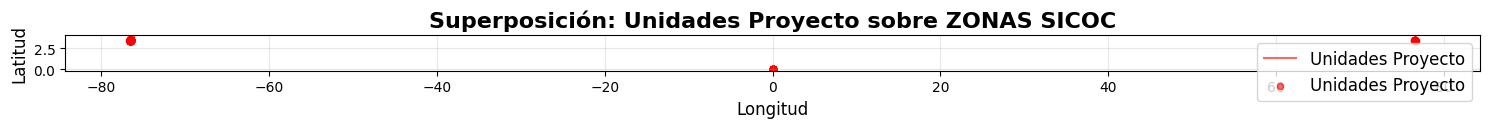

✓ Visualización generada


In [87]:
# Crear visualización de la superposición
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Plotear los polígonos del shapefile
gdf_zonas.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, linewidth=1.5, label='ZONAS SICOC')

# Plotear las geometrías del GeoJSON
gdf_unidades.plot(ax=ax, color='red', markersize=20, alpha=0.6, label='Unidades Proyecto')

# Configuración del gráfico
ax.set_title('Superposición: Unidades Proyecto sobre ZONAS SICOC', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualización generada")

## 8. Detalle de Qué Unidades están en Cada Zona

In [88]:
# Crear un listado detallado de qué unidades están en cada zona
# Primero, identificar las columnas relevantes del GeoJSON para mostrar
unidades_cols = [col for col in gdf_unidades.columns if col != 'geometry']
print(f"Columnas disponibles en unidades_proyecto: {unidades_cols[:10]}...")  # Mostrar primeras 10

# Agrupar por zona y listar las unidades
detalle_por_zona = {}

for zona_id in overlay_with_match[zona_col].unique():
    # Filtrar las unidades que están en esta zona
    unidades_en_zona = overlay_with_match[overlay_with_match[zona_col] == zona_id]
    
    # Guardar información relevante
    detalle_por_zona[zona_id] = {
        'cantidad': len(unidades_en_zona),
        'unidades': unidades_en_zona[unidades_cols[:5]].to_dict('records')  # Primeras 5 columnas
    }

print(f"\n✓ Detalle por zona creado para {len(detalle_por_zona)} zonas")

Columnas disponibles en unidades_proyecto: ['upid', 'has_valid_geometry', 'nombre_up', 'comuna_corregimiento', 'barrio_vereda', 'estado', 'direccion', 'ano', 'presupuesto_base', 'presupuesto_total_up']...

✓ Detalle por zona creado para 7 zonas


In [89]:
# Mostrar el detalle de las primeras 3 zonas como ejemplo
print("\nEjemplo de detalle para las primeras 3 zonas:")
print("=" * 80)

for i, (zona_id, info) in enumerate(list(detalle_por_zona.items())[:3]):
    print(f"\nZona ID: {zona_id}")
    print(f"Cantidad de unidades: {info['cantidad']}")
    print(f"Primeras unidades en esta zona:")
    for j, unidad in enumerate(info['unidades'][:3], 1):  # Mostrar primeras 3 unidades
        print(f"  {j}. {unidad}")
    print("-" * 80)


Ejemplo de detalle para las primeras 3 zonas:

Zona ID: 2.0
Cantidad de unidades: 3
Primeras unidades en esta zona:
  1. {'upid': 'UNP-1108', 'has_valid_geometry': True, 'nombre_up': 'Calle 1A Oeste Entre Carreras 74B Y 75', 'comuna_corregimiento': 'COMUNA 18', 'barrio_vereda': 'Mario Correa Rengifo'}
  2. {'upid': 'UNP-1110', 'has_valid_geometry': True, 'nombre_up': 'Calle 2 Oeste Entre Carreras 71 Y 76', 'comuna_corregimiento': 'COMUNA 18', 'barrio_vereda': 'Lourdes'}
  3. {'upid': 'UNP-929', 'has_valid_geometry': True, 'nombre_up': 'I.E. JUAN PABLO II', 'comuna_corregimiento': 'COMUNA 18', 'barrio_vereda': 'Prados del Sur'}
--------------------------------------------------------------------------------

Zona ID: 9.0
Cantidad de unidades: 5
Primeras unidades en esta zona:
  1. {'upid': 'UNP-225', 'has_valid_geometry': True, 'nombre_up': 'POLIDEPORTIVO REPÚBLICA DE ISRAEL', 'comuna_corregimiento': 'COMUNA 16', 'barrio_vereda': 'REPUBLICA DE ISRAEL'}
  2. {'upid': 'UNP-311', 'has_val

## 9. Exportar Resultados

In [90]:
# 1. Exportar el resultado completo del spatial join a CSV
output_csv = Path("test_outputs/superposicion_espacial_completa.csv")
output_csv.parent.mkdir(parents=True, exist_ok=True)

# Eliminar la columna geometry para el CSV
overlay_export = overlay_with_match.drop(columns=['geometry'])
overlay_export.to_csv(output_csv, index=False, encoding='utf-8-sig')
print(f"✓ Resultado completo exportado a: {output_csv}")

# 2. Exportar el resumen por zona a CSV
output_resumen_csv = Path("test_outputs/resumen_por_zona.csv")
resumen_detallado.to_csv(output_resumen_csv, index=False, encoding='utf-8-sig')
print(f"✓ Resumen por zona exportado a: {output_resumen_csv}")

# 3. Exportar el resultado completo a GeoJSON (con geometrías)
output_geojson = Path("test_outputs/superposicion_espacial_completa.geojson")
overlay_with_match.to_file(output_geojson, driver='GeoJSON')
print(f"✓ Resultado con geometrías exportado a: {output_geojson}")

✓ Resultado completo exportado a: test_outputs\superposicion_espacial_completa.csv
✓ Resumen por zona exportado a: test_outputs\resumen_por_zona.csv
✓ Resultado con geometrías exportado a: test_outputs\superposicion_espacial_completa.geojson


## 10. Estadísticas Finales

In [91]:
print("=" * 80)
print("RESUMEN DEL ANÁLISIS DE SUPERPOSICIÓN ESPACIAL")
print("=" * 80)
print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"  • Total de unidades en GeoJSON: {len(gdf_unidades)}")
print(f"  • Total de polígonos en ZONAS SICOC: {len(gdf_zonas)}")
print(f"  • Unidades con intersección: {len(overlay_with_match)}")
print(f"  • Unidades sin intersección: {len(gdf_unidades) - len(overlay_with_match)}")
print(f"  • Porcentaje de cobertura: {(len(overlay_with_match)/len(gdf_unidades)*100):.2f}%")

print(f"\n🗺️  DISTRIBUCIÓN POR ZONA:")
print(f"  • Zonas con unidades: {len(resumen_por_zona)}")
print(f"  • Zonas sin unidades: {len(gdf_zonas) - len(resumen_por_zona)}")

print(f"\n📈 ESTADÍSTICAS DE DISTRIBUCIÓN:")
print(f"  • Promedio de unidades por zona: {resumen_por_zona['cantidad_unidades'].mean():.2f}")
print(f"  • Máximo de unidades en una zona: {resumen_por_zona['cantidad_unidades'].max()}")
print(f"  • Mínimo de unidades en una zona: {resumen_por_zona['cantidad_unidades'].min()}")

print(f"\n✅ ARCHIVOS GENERADOS:")
print(f"  • {output_csv}")
print(f"  • {output_resumen_csv}")
print(f"  • {output_geojson}")
print("=" * 80)

RESUMEN DEL ANÁLISIS DE SUPERPOSICIÓN ESPACIAL

📊 ESTADÍSTICAS GENERALES:
  • Total de unidades en GeoJSON: 1246
  • Total de polígonos en ZONAS SICOC: 11
  • Unidades con intersección: 35
  • Unidades sin intersección: 1211
  • Porcentaje de cobertura: 2.81%

🗺️  DISTRIBUCIÓN POR ZONA:
  • Zonas con unidades: 7
  • Zonas sin unidades: 4

📈 ESTADÍSTICAS DE DISTRIBUCIÓN:
  • Promedio de unidades por zona: 5.00
  • Máximo de unidades en una zona: 8
  • Mínimo de unidades en una zona: 3

✅ ARCHIVOS GENERADOS:
  • test_outputs\superposicion_espacial_completa.csv
  • test_outputs\resumen_por_zona.csv
  • test_outputs\superposicion_espacial_completa.geojson


In [92]:
# Leer el archivo GeoJSON generado
overlay_geojson = gpd.read_file("test_outputs/superposicion_espacial_completa.geojson")

print(f"✓ Archivo GeoJSON cargado correctamente")
print(f"  - Número de registros: {len(overlay_geojson)}")
print(f"  - CRS: {overlay_geojson.crs}")
print(f"  - Tipo de geometría: {overlay_geojson.geometry.type.unique()}")
print(f"\nColumnas disponibles:")
print(overlay_geojson.columns.tolist())

✓ Archivo GeoJSON cargado correctamente
  - Número de registros: 35
  - CRS: EPSG:4326
  - Tipo de geometría: ['LineString' 'MultiLineString' 'Point']

Columnas disponibles:
['upid', 'has_valid_geometry', 'nombre_up', 'comuna_corregimiento', 'barrio_vereda', 'estado', 'direccion', 'ano', 'presupuesto_base', 'presupuesto_total_up', 'avance_obra', 'bpin', 'tipo_intervencion', 'clase_obra', 'nombre_centro_gestor', 'centro_gestor', 'tipo_equipamiento', 'fuente_financiacion', 'index_right', 'Direccion', 'Barrios', 'Shape__Are', 'Shape__Len', 'geometry']


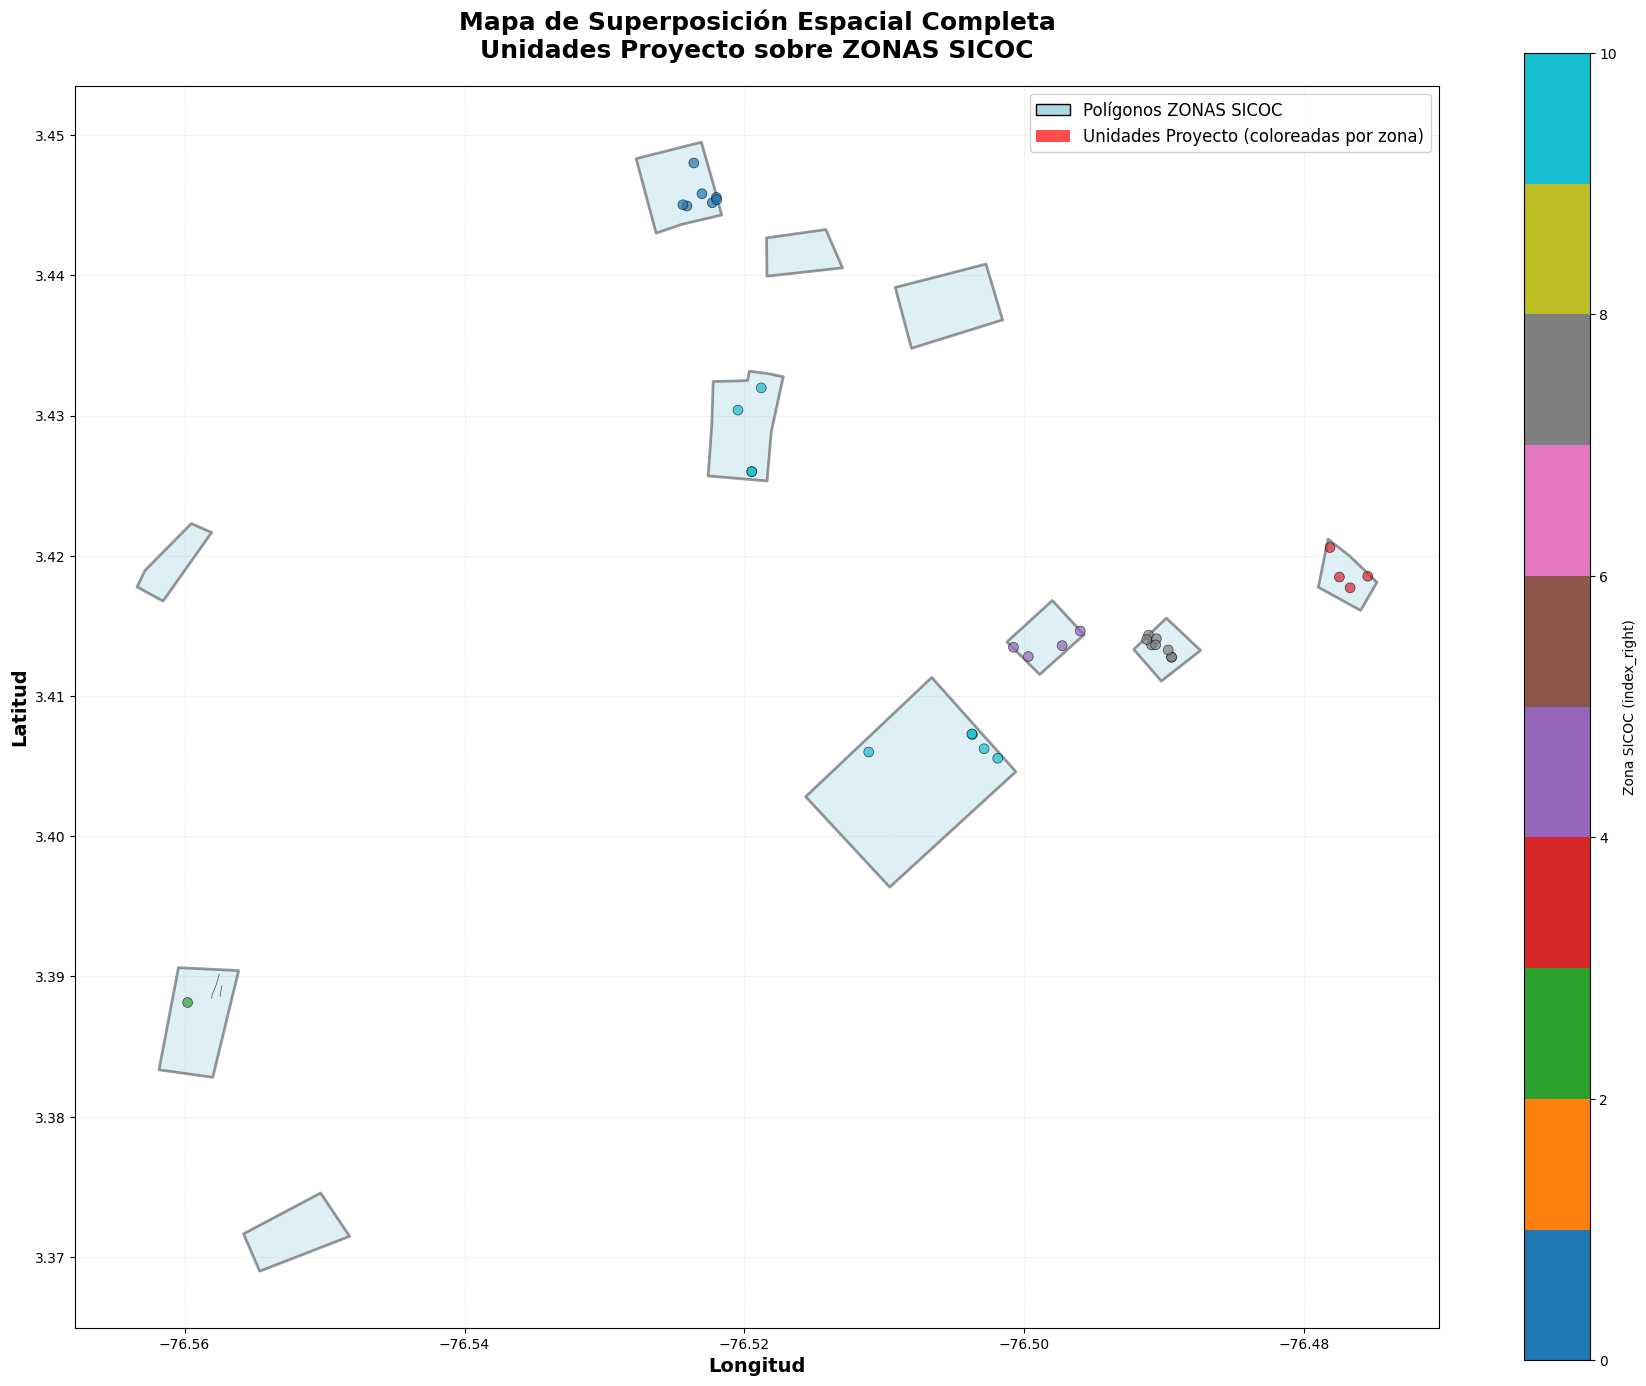


✓ Visualización del archivo GeoJSON generado
  - Archivo: test_outputs/superposicion_espacial_completa.geojson
  - Total de unidades visualizadas: 35
  - Zonas representadas: [0.0, 2.0, 3.0, 4.0, 7.0, 9.0, 10.0]


In [93]:
from matplotlib.patches import Patch

# Crear visualización del archivo GeoJSON resultante
fig, ax = plt.subplots(1, 1, figsize=(18, 14))

# Plotear los polígonos del shapefile como base
gdf_zonas.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.4, linewidth=2, label='ZONAS SICOC')

# Plotear las geometrías del GeoJSON resultante coloreadas por zona
overlay_geojson.plot(
    ax=ax, 
    column='index_right',  # Colorear según la zona
    cmap='tab10',  # Paleta de colores
    markersize=50, 
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5,
    legend=True,
    legend_kwds={'label': 'Zona SICOC (index_right)', 'orientation': 'vertical'}
)

# Configuración del gráfico
ax.set_title('Mapa de Superposición Espacial Completa\nUnidades Proyecto sobre ZONAS SICOC', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Longitud', fontsize=14, fontweight='bold')
ax.set_ylabel('Latitud', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Añadir leyenda personalizada
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='Polígonos ZONAS SICOC'),
    Patch(facecolor='red', alpha=0.7, label='Unidades Proyecto (coloreadas por zona)')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

print(f"\n✓ Visualización del archivo GeoJSON generado")
print(f"  - Archivo: test_outputs/superposicion_espacial_completa.geojson")
print(f"  - Total de unidades visualizadas: {len(overlay_geojson)}")
print(f"  - Zonas representadas: {sorted(overlay_geojson['index_right'].unique())}")

In [94]:
# Obtener la tabla de atributos del GeoJSON (sin la columna de geometría)
tabla_atributos_geojson = overlay_geojson.drop(columns=['geometry'])

print(f"✓ Tabla de atributos extraída del GeoJSON")
print(f"  - Número de registros: {len(tabla_atributos_geojson)}")
print(f"  - Número de columnas: {len(tabla_atributos_geojson.columns)}")
print(f"\nColumnas en la tabla de atributos:")
print(tabla_atributos_geojson.columns.tolist())
print(f"\nVista previa de la tabla:")
tabla_atributos_geojson

✓ Tabla de atributos extraída del GeoJSON
  - Número de registros: 35
  - Número de columnas: 23

Columnas en la tabla de atributos:
['upid', 'has_valid_geometry', 'nombre_up', 'comuna_corregimiento', 'barrio_vereda', 'estado', 'direccion', 'ano', 'presupuesto_base', 'presupuesto_total_up', 'avance_obra', 'bpin', 'tipo_intervencion', 'clase_obra', 'nombre_centro_gestor', 'centro_gestor', 'tipo_equipamiento', 'fuente_financiacion', 'index_right', 'Direccion', 'Barrios', 'Shape__Are', 'Shape__Len']

Vista previa de la tabla:


,upid,has_valid_geometry,nombre_up,comuna_corregimiento,barrio_vereda,estado,direccion,ano,presupuesto_base,presupuesto_total_up,avance_obra,bpin,tipo_intervencion,clase_obra,nombre_centro_gestor,centro_gestor,tipo_equipamiento,fuente_financiacion,index_right,Direccion,Barrios,Shape__Are,Shape__Len
0,UNP-1108,True,Calle 1A Oeste Entre Carreras 74B Y 75,COMUNA 18,Mario Correa Rengifo,Finalizado,Calle 2 Oeste Entre Carreras 71 Y 76 - Calle...,2024,85439007,None,100.0,2.023760e+12,None,Obra Vial,Secretaría de Infraestructura,None,Vías,Recursos Propios,2.0,Cra 73 & Cra 87 Oeste entre Cl 2a Oe & Cl 4a Oe,E18,0.000031,0.023446
1,UNP-1110,True,Calle 2 Oeste Entre Carreras 71 Y 76,COMUNA 18,Lourdes,Finalizado,Calle 2 Oeste Entre Carreras 71 Y 76 - Calle...,2024,170878015,None,100.0,2.023760e+12,None,Obra Vial,Secretaría de Infraestructura,None,Vías,Recursos Propios,2.0,Cra 73 & Cra 87 Oeste entre Cl 2a Oe & Cl 4a Oe,E18,0.000031,0.023446
2,UNP-225,True,POLIDEPORTIVO REPÚBLICA DE ISRAEL,COMUNA 16,REPUBLICA DE ISRAEL,En alistamiento,CARRERA 43 Y 43B CON CALLE 44 Y 46,2025,110664112,None,0.0,NaN,Adecuaciones y mantenimientos,None,Secretaría del Deporte y la Recreación,None,Infraestructura recreo deportiva,Empréstito,9.0,Cra 41B & 47A entre Cl 44 & Cl 54,E15 y E16,0.000110,0.042437
3,UNP-261,True,biblioteca publica arco iris,COMUNA 15,Mójica II,En alistamiento,Cl. 85a No. 28e6 -102,2025,651777804,None,0.0,2.147484e+09,Adecuaciones y mantenimientos,None,Secretaría de Cultura,None,Bibliotecas,Empréstito,7.0,Cl 81 & Cl 91 entre Cra 28E6 & Cra 29,E15,0.000011,0.013160
4,UNP-311,True,IPS - EL VALLADO,COMUNA 15,El Vallado,En alistamiento,Carrera 41B con Calle 51,2026,644482338,None,0.0,NaN,Adecuaciones y mantenimientos,None,Secretaría de Salud Pública,None,IPS,Ingresos con destinación específica,9.0,Cra 41B & 47A entre Cl 44 & Cl 54,E15 y E16,0.000110,0.042437
5,UNP-338,True,POLIDEPORTIVO SAN CRISTOBAL,COMUNA 10,SAN CRISTOBAL,En ejecución,CARRERAS 26 Y 28 CON CALLES 23 Y 25,2025,119029132,None,50.0,NaN,Adecuaciones y mantenimientos,None,Secretaría del Deporte y la Recreación,None,Infraestructura recreo deportiva,Empréstito,10.0,Cra 25 & 32 entre calles 19 y 26B,E10 y E11,0.000000,0.000000
6,UNP-349,True,IPS - AGUA BLANCA,COMUNA 11,Aguablanca,En ejecución,Carrera 25A No. 25-105,2025,591006425,None,65.0,NaN,Adecuaciones y mantenimientos,None,Secretaría de Salud Pública,None,IPS,Ingresos con destinación específica,10.0,Cra 25 & 32 entre calles 19 y 26B,E10 y E11,0.000000,0.000000
7,UNP-35,True,IPS - INTERVENIDAS,COMUNA 14,Puertas del Sol,En alistamiento,Transversal 103 diagonal 26P-15,2025,501998051,None,0.0,NaN,Adecuaciones y mantenimientos,None,Secretaría de Salud Pública,None,IPS,Ingresos con destinación específica,3.0,Dg 26p18 & Cra 27 entre Tv 103 & 108,E14,0.000011,0.013948
8,UNP-444,True,Subsidios de Mejoramiento de Vivienda,COMUNA 09,BARRIO OBRERO,En alistamiento,CARRERA 11 #19-20,None,13511436,None,0.0,2.147484e+09,Obra nueva,None,Secretaría de Vivienda Social y Habitat,None,Vivienda mejoramiento,Empréstito,0.0,Cra 10 & Cra 14 entre Cl 15 & Cl 20,E9,0.000026,0.020569
9,UNP-530,True,biblioteca pública arco iris,COMUNA 15,Mójica II,En ejecución,Cra. 26t No. 72w-31,2025,15077676,None,80.0,2.147484e+09,Adecuaciones y mantenimientos,None,Secretaría de Cultura,None,Bibliotecas,Recursos propios,7.0,Cl 81 & Cl 91 entre Cra 28E6 & Cra 29,E15,0.000011,0.013160


In [95]:
# Exportar la tabla de atributos del GeoJSON a Excel
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_excel = Path(f"test_outputs/tabla_atributos_geojson_{timestamp}.xlsx")
output_excel.parent.mkdir(parents=True, exist_ok=True)

tabla_atributos_geojson.to_excel(output_excel, index=False, engine='openpyxl')

print(f"✓ Tabla de atributos exportada a Excel: {output_excel}")
print(f"  - Número de registros: {len(tabla_atributos_geojson)}")
print(f"  - Número de columnas: {len(tabla_atributos_geojson.columns)}")

✓ Tabla de atributos exportada a Excel: test_outputs\tabla_atributos_geojson_20251114_170635.xlsx
  - Número de registros: 35
  - Número de columnas: 23


In [96]:
## 11. Reporte Completo de la Tabla Resultante

In [ ]:
# Información general de la tabla
print("=" * 100)
print("REPORTE COMPLETO DE LA TABLA RESULTANTE")
print("=" * 100)

print(f"\n📋 INFORMACIÓN GENERAL:")
print(f"  • Total de registros: {len(tabla_atributos_geojson)}")
print(f"  • Total de columnas: {len(tabla_atributos_geojson.columns)}")
print(f"  • Memoria utilizada: {tabla_atributos_geojson.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n📊 COLUMNAS DISPONIBLES:")
for i, col in enumerate(tabla_atributos_geojson.columns, 1):
    dtype = tabla_atributos_geojson[col].dtype
    non_null = tabla_atributos_geojson[col].notna().sum()
    null_count = tabla_atributos_geojson[col].isna().sum()
    print(f"  {i:2d}. {col:40s} | Tipo: {str(dtype):15s} | No nulos: {non_null:5d} | Nulos: {null_count:5d}")

print("=" * 100)

In [97]:
# Análisis de variables categóricas clave
print("=" * 100)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("=" * 100)

# Función auxiliar para mostrar conteos
def mostrar_conteo(df, columna, titulo):
    if columna in df.columns:
        print(f"\n{titulo}")
        print("-" * 100)
        conteo = df[columna].value_counts(dropna=False)
        porcentaje = df[columna].value_counts(dropna=False, normalize=True) * 100
        
        resultado = pd.DataFrame({
            'Categoría': conteo.index,
            'Cantidad': conteo.values,
            'Porcentaje': porcentaje.values.round(2)
        })
        
        print(resultado.to_string(index=False))
        print(f"\nTotal categorías únicas: {df[columna].nunique()}")
        print(f"Valores nulos: {df[columna].isna().sum()}")
    else:
        print(f"\n⚠ Columna '{columna}' no encontrada en la tabla")

# Lista de variables a analizar
variables_categoricas = [
    ('nombre_centro_gestor', '📌 CONTEO POR NOMBRE CENTRO GESTOR'),
    ('tipo_intervencion', '🔧 CONTEO POR TIPO DE INTERVENCIÓN'),
    ('avance_obra', '📈 CONTEO POR AVANCE DE OBRA'),
    ('tipo_equipamiento', '🏢 CONTEO POR TIPO DE EQUIPAMIENTO'),
    ('estado', '🚦 CONTEO POR ESTADO'),
    ('nombre_rubro_proyecto', '💰 CONTEO POR RUBRO DE PROYECTO'),
    ('nombre_fuente_recursos', '💵 CONTEO POR FUENTE DE RECURSOS'),
    ('comuna', '🗺️ CONTEO POR COMUNA'),
    ('barrio', '🏘️ CONTEO POR BARRIO'),
    ('sector', '🏗️ CONTEO POR SECTOR')
]

for columna, titulo in variables_categoricas:
    mostrar_conteo(tabla_atributos_geojson, columna, titulo)

ANÁLISIS DE VARIABLES CATEGÓRICAS

📌 CONTEO POR NOMBRE CENTRO GESTOR
----------------------------------------------------------------------------------------------------
                              Categoría  Cantidad  Porcentaje
Secretaría de Vivienda Social y Habitat        23       65.71
            Secretaría de Salud Pública         3        8.57
                Secretaría de Educación         3        8.57
          Secretaría de Infraestructura         2        5.71
 Secretaría del Deporte y la Recreación         2        5.71
                  Secretaría de Cultura         2        5.71

Total categorías únicas: 6
Valores nulos: 0

🔧 CONTEO POR TIPO DE INTERVENCIÓN
----------------------------------------------------------------------------------------------------
                    Categoría  Cantidad  Porcentaje
                   Obra nueva        23       65.71
Adecuaciones y mantenimientos        10       28.57
                         None         2        5.71

Total 

In [98]:
# Análisis de variables numéricas
print("\n" + "=" * 100)
print("ANÁLISIS DE VARIABLES NUMÉRICAS")
print("=" * 100)

# Identificar columnas numéricas
columnas_numericas = tabla_atributos_geojson.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n📊 COLUMNAS NUMÉRICAS IDENTIFICADAS: {len(columnas_numericas)}")
print(columnas_numericas)

# Análisis específico de presupuesto
variables_presupuesto = [col for col in columnas_numericas if 'presupuesto' in col.lower() or 'valor' in col.lower() or 'monto' in col.lower()]

if variables_presupuesto:
    print(f"\n💰 VARIABLES DE PRESUPUESTO/VALORES:")
    for col in variables_presupuesto:
        print(f"\n{col.upper()}:")
        print("-" * 100)
        if col in tabla_atributos_geojson.columns:
            valores = tabla_atributos_geojson[col].dropna()
            if len(valores) > 0:
                stats = {
                    'Count': len(valores),
                    'Nulos': tabla_atributos_geojson[col].isna().sum(),
                    'Mínimo': f"${valores.min():,.2f}",
                    'Máximo': f"${valores.max():,.2f}",
                    'Media': f"${valores.mean():,.2f}",
                    'Mediana': f"${valores.median():,.2f}",
                    'Desv. Estándar': f"${valores.std():,.2f}",
                    'Total': f"${valores.sum():,.2f}"
                }
                for key, value in stats.items():
                    print(f"  {key:20s}: {value}")
            else:
                print("  No hay datos disponibles")

# Estadísticas descriptivas completas
print(f"\n📈 ESTADÍSTICAS DESCRIPTIVAS DE TODAS LAS VARIABLES NUMÉRICAS:")
print("-" * 100)
if columnas_numericas:
    print(tabla_atributos_geojson[columnas_numericas].describe().T.to_string())
else:
    print("  No se encontraron columnas numéricas")


ANÁLISIS DE VARIABLES NUMÉRICAS

📊 COLUMNAS NUMÉRICAS IDENTIFICADAS: 5
['avance_obra', 'bpin', 'index_right', 'Shape__Are', 'Shape__Len']

📈 ESTADÍSTICAS DESCRIPTIVAS DE TODAS LAS VARIABLES NUMÉRICAS:
----------------------------------------------------------------------------------------------------
             count          mean           std           min           25%           50%           75%           max
avance_obra   35.0  1.985714e+01  3.808824e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+02
bpin          30.0  1.369217e+11  5.128995e+11  2.147484e+09  2.147484e+09  2.147484e+09  2.147484e+09  2.023760e+12
index_right   35.0  5.000000e+00  3.572773e+00  0.000000e+00  2.000000e+00  4.000000e+00  8.000000e+00  1.000000e+01
Shape__Are    35.0  2.894298e-05  3.461621e-05  0.000000e+00  1.076711e-05  1.434167e-05  2.611032e-05  1.096781e-04
Shape__Len    35.0  1.853510e-02  1.174422e-02  0.000000e+00  1.315975e-02  1.528770e-02  2.056900e-02  4.243702

In [99]:
# Análisis de fechas
print("\n" + "=" * 100)
print("ANÁLISIS DE VARIABLES DE FECHA")
print("=" * 100)

# Identificar columnas de fecha
columnas_fecha = [col for col in tabla_atributos_geojson.columns if 'fecha' in col.lower() or 'date' in col.lower() or 'año' in col.lower() or 'ano' in col.lower()]

if columnas_fecha:
    print(f"\n📅 VARIABLES DE FECHA IDENTIFICADAS:")
    for col in columnas_fecha:
        print(f"\n{col.upper()}:")
        print("-" * 100)
        if col in tabla_atributos_geojson.columns:
            valores = tabla_atributos_geojson[col].dropna()
            conteo = tabla_atributos_geojson[col].value_counts().head(10)
            
            print(f"  Total registros con fecha: {len(valores)}")
            print(f"  Registros sin fecha: {tabla_atributos_geojson[col].isna().sum()}")
            print(f"  Valores únicos: {tabla_atributos_geojson[col].nunique()}")
            
            if len(conteo) > 0:
                print(f"\n  Top 10 valores más frecuentes:")
                for valor, cantidad in conteo.items():
                    print(f"    {valor}: {cantidad} ({cantidad/len(tabla_atributos_geojson)*100:.2f}%)")
else:
    print("\n  No se encontraron columnas de fecha")


ANÁLISIS DE VARIABLES DE FECHA

📅 VARIABLES DE FECHA IDENTIFICADAS:

ANO:
----------------------------------------------------------------------------------------------------
  Total registros con fecha: 12
  Registros sin fecha: 23
  Valores únicos: 3

  Top 10 valores más frecuentes:
    2025: 6 (17.14%)
    2024: 5 (14.29%)
    2026: 1 (2.86%)


In [100]:
# Análisis cruzado: Presupuesto por Centro Gestor
print("\n" + "=" * 100)
print("ANÁLISIS CRUZADOS")
print("=" * 100)

# Presupuesto por Centro Gestor
if 'nombre_centro_gestor' in tabla_atributos_geojson.columns:
    col_presupuesto = [col for col in tabla_atributos_geojson.columns if 'presupuesto_base' in col.lower()]
    
    if col_presupuesto:
        col_pres = col_presupuesto[0]
        print(f"\n💰 PRESUPUESTO POR CENTRO GESTOR ({col_pres}):")
        print("-" * 100)
        
        resumen_centro = tabla_atributos_geojson.groupby('nombre_centro_gestor')[col_pres].agg([
            ('Cantidad', 'count'),
            ('Total', 'sum'),
            ('Promedio', 'mean'),
            ('Mínimo', 'min'),
            ('Máximo', 'max')
        ]).sort_values('Total', ascending=False)
        
        # Formatear con símbolos de moneda
        resumen_centro['Total'] = resumen_centro['Total'].apply(lambda x: f"${x:,.2f}")
        resumen_centro['Promedio'] = resumen_centro['Promedio'].apply(lambda x: f"${x:,.2f}")
        resumen_centro['Mínimo'] = resumen_centro['Mínimo'].apply(lambda x: f"${x:,.2f}")
        resumen_centro['Máximo'] = resumen_centro['Máximo'].apply(lambda x: f"${x:,.2f}")
        
        print(resumen_centro.to_string())


ANÁLISIS CRUZADOS

💰 PRESUPUESTO POR CENTRO GESTOR (presupuesto_base):
----------------------------------------------------------------------------------------------------
                                         Cantidad              Total         Promedio           Mínimo           Máximo
nombre_centro_gestor                                                                                                   
Secretaría de Salud Pública                     3  $1,737,486,814.00  $579,162,271.33  $501,998,051.00  $644,482,338.00
Secretaría de Cultura                           2    $666,855,480.00  $333,427,740.00   $15,077,676.00  $651,777,804.00
Secretaría de Vivienda Social y Habitat        23    $302,761,415.00   $13,163,539.78    $8,331,036.00   $13,523,081.00
Secretaría de Infraestructura                   2    $256,317,022.00  $128,158,511.00   $85,439,007.00  $170,878,015.00
Secretaría del Deporte y la Recreación          2    $229,693,244.00  $114,846,622.00  $110,664,112.00  $11

In [101]:
# Análisis cruzado: Tipo de Intervención
if 'tipo_intervencion' in tabla_atributos_geojson.columns:
    col_presupuesto = [col for col in tabla_atributos_geojson.columns if 'presupuesto_base' in col.lower()]
    
    if col_presupuesto:
        col_pres = col_presupuesto[0]
        print(f"\n🔧 PRESUPUESTO POR TIPO DE INTERVENCIÓN:")
        print("-" * 100)
        
        resumen_intervencion = tabla_atributos_geojson.groupby('tipo_intervencion')[col_pres].agg([
            ('Cantidad', 'count'),
            ('Total', 'sum'),
            ('Promedio', 'mean'),
            ('Mínimo', 'min'),
            ('Máximo', 'max')
        ]).sort_values('Total', ascending=False)
        
        resumen_intervencion['Total'] = resumen_intervencion['Total'].apply(lambda x: f"${x:,.2f}")
        resumen_intervencion['Promedio'] = resumen_intervencion['Promedio'].apply(lambda x: f"${x:,.2f}")
        resumen_intervencion['Mínimo'] = resumen_intervencion['Mínimo'].apply(lambda x: f"${x:,.2f}")
        resumen_intervencion['Máximo'] = resumen_intervencion['Máximo'].apply(lambda x: f"${x:,.2f}")
        
        print(resumen_intervencion.to_string())


🔧 PRESUPUESTO POR TIPO DE INTERVENCIÓN:
----------------------------------------------------------------------------------------------------
                               Cantidad              Total         Promedio         Mínimo           Máximo
tipo_intervencion                                                                                          
Adecuaciones y mantenimientos        10  $2,698,534,565.00  $269,853,456.50  $5,890,509.00  $651,777,804.00
Obra nueva                           23    $302,761,415.00   $13,163,539.78  $8,331,036.00   $13,523,081.00


In [102]:
# Análisis cruzado: Avance de Obra
if 'avance_obra' in tabla_atributos_geojson.columns:
    print(f"\n📈 DISTRIBUCIÓN POR AVANCE DE OBRA:")
    print("-" * 100)
    
    avance_conteo = tabla_atributos_geojson['avance_obra'].value_counts().sort_index()
    avance_porcentaje = tabla_atributos_geojson['avance_obra'].value_counts(normalize=True).sort_index() * 100
    
    resultado_avance = pd.DataFrame({
        'Avance': avance_conteo.index,
        'Cantidad': avance_conteo.values,
        'Porcentaje': avance_porcentaje.values.round(2)
    })
    
    print(resultado_avance.to_string(index=False))
    
    # Si hay columna de presupuesto, analizar por avance
    col_presupuesto = [col for col in tabla_atributos_geojson.columns if 'presupuesto_base' in col.lower()]
    if col_presupuesto:
        col_pres = col_presupuesto[0]
        print(f"\n💰 PRESUPUESTO POR AVANCE DE OBRA:")
        print("-" * 100)
        
        resumen_avance = tabla_atributos_geojson.groupby('avance_obra')[col_pres].agg([
            ('Cantidad', 'count'),
            ('Total', 'sum'),
            ('Promedio', 'mean')
        ]).sort_index()
        
        resumen_avance['Total'] = resumen_avance['Total'].apply(lambda x: f"${x:,.2f}")
        resumen_avance['Promedio'] = resumen_avance['Promedio'].apply(lambda x: f"${x:,.2f}")
        
        print(resumen_avance.to_string())


📈 DISTRIBUCIÓN POR AVANCE DE OBRA:
----------------------------------------------------------------------------------------------------
 Avance  Cantidad  Porcentaje
    0.0        27       77.14
   50.0         1        2.86
   65.0         1        2.86
   80.0         1        2.86
  100.0         5       14.29

💰 PRESUPUESTO POR AVANCE DE OBRA:
----------------------------------------------------------------------------------------------------
             Cantidad              Total         Promedio
avance_obra                                              
0.0                27  $2,211,683,720.00   $81,914,211.85
50.0                1    $119,029,132.00  $119,029,132.00
65.0                1    $591,006,425.00  $591,006,425.00
80.0                1     $15,077,676.00   $15,077,676.00
100.0               5    $320,816,049.00   $64,163,209.80


In [103]:
# Análisis cruzado: Tipo de Equipamiento
if 'tipo_equipamiento' in tabla_atributos_geojson.columns:
    print(f"\n🏢 DISTRIBUCIÓN POR TIPO DE EQUIPAMIENTO:")
    print("-" * 100)
    
    equip_conteo = tabla_atributos_geojson['tipo_equipamiento'].value_counts()
    equip_porcentaje = tabla_atributos_geojson['tipo_equipamiento'].value_counts(normalize=True) * 100
    
    resultado_equip = pd.DataFrame({
        'Tipo Equipamiento': equip_conteo.index,
        'Cantidad': equip_conteo.values,
        'Porcentaje': equip_porcentaje.values.round(2)
    })
    
    print(resultado_equip.to_string(index=False))
    
    # Si hay columna de presupuesto, analizar por tipo de equipamiento
    col_presupuesto = [col for col in tabla_atributos_geojson.columns if 'presupuesto_base' in col.lower()]
    if col_presupuesto:
        col_pres = col_presupuesto[0]
        print(f"\n💰 PRESUPUESTO POR TIPO DE EQUIPAMIENTO:")
        print("-" * 100)
        
        resumen_equip = tabla_atributos_geojson.groupby('tipo_equipamiento')[col_pres].agg([
            ('Cantidad', 'count'),
            ('Total', 'sum'),
            ('Promedio', 'mean')
        ]).sort_values('Total', ascending=False)
        
        resumen_equip['Total'] = resumen_equip['Total'].apply(lambda x: f"${x:,.2f}")
        resumen_equip['Promedio'] = resumen_equip['Promedio'].apply(lambda x: f"${x:,.2f}")
        
        print(resumen_equip.to_string())


🏢 DISTRIBUCIÓN POR TIPO DE EQUIPAMIENTO:
----------------------------------------------------------------------------------------------------
               Tipo Equipamiento  Cantidad  Porcentaje
           Vivienda mejoramiento        23       65.71
                             IPS         3        8.57
           Institución Educativa         3        8.57
                            Vías         2        5.71
Infraestructura recreo deportiva         2        5.71
                     Bibliotecas         2        5.71

💰 PRESUPUESTO POR TIPO DE EQUIPAMIENTO:
----------------------------------------------------------------------------------------------------
                                  Cantidad              Total         Promedio
tipo_equipamiento                                                             
IPS                                      3  $1,737,486,814.00  $579,162,271.33
Bibliotecas                              2    $666,855,480.00  $333,427,740.00
Vivienda mejor

In [104]:
# Análisis por ubicación geográfica
print("\n" + "=" * 100)
print("ANÁLISIS GEOGRÁFICO")
print("=" * 100)

# Por Comuna
if 'comuna' in tabla_atributos_geojson.columns:
    print(f"\n🗺️ DISTRIBUCIÓN POR COMUNA:")
    print("-" * 100)
    
    comuna_conteo = tabla_atributos_geojson['comuna'].value_counts().sort_index()
    
    col_presupuesto = [col for col in tabla_atributos_geojson.columns if 'presupuesto_base' in col.lower()]
    if col_presupuesto:
        col_pres = col_presupuesto[0]
        resumen_comuna = tabla_atributos_geojson.groupby('comuna').agg({
            col_pres: ['count', 'sum', 'mean']
        })
        resumen_comuna.columns = ['Cantidad', 'Total_Presupuesto', 'Promedio_Presupuesto']
        resumen_comuna = resumen_comuna.sort_values('Total_Presupuesto', ascending=False)
        
        resumen_comuna['Total_Presupuesto'] = resumen_comuna['Total_Presupuesto'].apply(lambda x: f"${x:,.2f}")
        resumen_comuna['Promedio_Presupuesto'] = resumen_comuna['Promedio_Presupuesto'].apply(lambda x: f"${x:,.2f}")
        
        print(resumen_comuna.to_string())
    else:
        print(comuna_conteo.to_string())

# Por Barrio (Top 20)
if 'barrio' in tabla_atributos_geojson.columns:
    print(f"\n🏘️ TOP 20 BARRIOS CON MÁS PROYECTOS:")
    print("-" * 100)
    
    barrio_conteo = tabla_atributos_geojson['barrio'].value_counts().head(20)
    barrio_porcentaje = (barrio_conteo / len(tabla_atributos_geojson) * 100).round(2)
    
    resultado_barrio = pd.DataFrame({
        'Barrio': barrio_conteo.index,
        'Cantidad': barrio_conteo.values,
        'Porcentaje': barrio_porcentaje.values
    })
    
    print(resultado_barrio.to_string(index=False))


ANÁLISIS GEOGRÁFICO


In [105]:
# Análisis de Zonas SICOC
print("\n" + "=" * 100)
print("ANÁLISIS DE DISTRIBUCIÓN EN ZONAS SICOC")
print("=" * 100)

if 'index_right' in tabla_atributos_geojson.columns:
    print(f"\n📍 UNIDADES POR ZONA SICOC:")
    print("-" * 100)
    
    zona_conteo = tabla_atributos_geojson['index_right'].value_counts().sort_index()
    
    col_presupuesto = [col for col in tabla_atributos_geojson.columns if 'presupuesto_base' in col.lower()]
    if col_presupuesto:
        col_pres = col_presupuesto[0]
        resumen_zona_sicoc = tabla_atributos_geojson.groupby('index_right').agg({
            col_pres: ['count', 'sum', 'mean']
        })
        resumen_zona_sicoc.columns = ['Cantidad_Unidades', 'Total_Presupuesto', 'Promedio_Presupuesto']
        resumen_zona_sicoc = resumen_zona_sicoc.sort_values('Cantidad_Unidades', ascending=False)
        
        # Añadir porcentaje
        resumen_zona_sicoc['Porcentaje'] = (resumen_zona_sicoc['Cantidad_Unidades'] / resumen_zona_sicoc['Cantidad_Unidades'].sum() * 100).round(2)
        
        # Formatear presupuestos
        resumen_zona_sicoc['Total_Presupuesto_fmt'] = resumen_zona_sicoc['Total_Presupuesto'].apply(lambda x: f"${x:,.2f}")
        resumen_zona_sicoc['Promedio_Presupuesto_fmt'] = resumen_zona_sicoc['Promedio_Presupuesto'].apply(lambda x: f"${x:,.2f}")
        
        print(resumen_zona_sicoc[['Cantidad_Unidades', 'Porcentaje', 'Total_Presupuesto_fmt', 'Promedio_Presupuesto_fmt']].to_string())
    else:
        print(zona_conteo.to_string())


ANÁLISIS DE DISTRIBUCIÓN EN ZONAS SICOC

📍 UNIDADES POR ZONA SICOC:
----------------------------------------------------------------------------------------------------
             Cantidad_Unidades  Porcentaje Total_Presupuesto_fmt Promedio_Presupuesto_fmt
index_right                                                                              
7.0                          8       22.86       $745,949,745.00           $93,243,718.12
0.0                          7       20.00        $94,150,776.00           $13,450,110.86
9.0                          5       14.29       $795,697,015.00          $159,139,403.00
3.0                          4       11.43       $542,105,034.00          $135,526,258.50
4.0                          4       11.43        $48,858,826.00           $12,214,706.50
10.0                         4       11.43       $768,644,075.00          $192,161,018.75
2.0                          3        8.57       $262,207,531.00           $87,402,510.33


## 12. Exportar Reporte Completo a Excel

In [106]:
# Crear un archivo Excel con múltiples hojas para el reporte completo
output_reporte_excel = Path("test_outputs/reporte_completo_analisis.xlsx")

with pd.ExcelWriter(output_reporte_excel, engine='openpyxl') as writer:
    
    # Hoja 1: Datos completos
    tabla_atributos_geojson.to_excel(writer, sheet_name='Datos_Completos', index=False)
    
    # Hoja 2: Resumen por Centro Gestor
    if 'nombre_centro_gestor' in tabla_atributos_geojson.columns:
        resumen_centro_gestor = tabla_atributos_geojson['nombre_centro_gestor'].value_counts().reset_index()
        resumen_centro_gestor.columns = ['Centro_Gestor', 'Cantidad']
        resumen_centro_gestor.to_excel(writer, sheet_name='Por_Centro_Gestor', index=False)
    
    # Hoja 3: Resumen por Tipo de Intervención
    if 'tipo_intervencion' in tabla_atributos_geojson.columns:
        resumen_tipo_interv = tabla_atributos_geojson['tipo_intervencion'].value_counts().reset_index()
        resumen_tipo_interv.columns = ['Tipo_Intervencion', 'Cantidad']
        resumen_tipo_interv.to_excel(writer, sheet_name='Por_Tipo_Intervencion', index=False)
    
    # Hoja 4: Resumen por Avance de Obra
    if 'avance_obra' in tabla_atributos_geojson.columns:
        resumen_avance_obra = tabla_atributos_geojson['avance_obra'].value_counts().reset_index()
        resumen_avance_obra.columns = ['Avance_Obra', 'Cantidad']
        resumen_avance_obra.to_excel(writer, sheet_name='Por_Avance_Obra', index=False)
    
    # Hoja 5: Resumen por Tipo de Equipamiento
    if 'tipo_equipamiento' in tabla_atributos_geojson.columns:
        resumen_tipo_equip = tabla_atributos_geojson['tipo_equipamiento'].value_counts().reset_index()
        resumen_tipo_equip.columns = ['Tipo_Equipamiento', 'Cantidad']
        resumen_tipo_equip.to_excel(writer, sheet_name='Por_Tipo_Equipamiento', index=False)
    
    # Hoja 6: Resumen por Comuna
    if 'comuna' in tabla_atributos_geojson.columns:
        resumen_comuna_exp = tabla_atributos_geojson['comuna'].value_counts().reset_index()
        resumen_comuna_exp.columns = ['Comuna', 'Cantidad']
        resumen_comuna_exp.to_excel(writer, sheet_name='Por_Comuna', index=False)
    
    # Hoja 7: Resumen por Barrio (Top 50)
    if 'barrio' in tabla_atributos_geojson.columns:
        resumen_barrio_exp = tabla_atributos_geojson['barrio'].value_counts().head(50).reset_index()
        resumen_barrio_exp.columns = ['Barrio', 'Cantidad']
        resumen_barrio_exp.to_excel(writer, sheet_name='Top_50_Barrios', index=False)
    
    # Hoja 8: Resumen por Zona SICOC
    if 'index_right' in tabla_atributos_geojson.columns:
        resumen_zona_exp = tabla_atributos_geojson['index_right'].value_counts().reset_index()
        resumen_zona_exp.columns = ['Zona_SICOC_Index', 'Cantidad']
        resumen_zona_exp.to_excel(writer, sheet_name='Por_Zona_SICOC', index=False)
    
    # Hoja 9: Estadísticas descriptivas numéricas
    columnas_numericas = tabla_atributos_geojson.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if columnas_numericas:
        stats_numericas = tabla_atributos_geojson[columnas_numericas].describe().T
        stats_numericas.to_excel(writer, sheet_name='Estadisticas_Numericas')

print(f"✓ Reporte completo exportado a Excel: {output_reporte_excel}")
print(f"  El archivo contiene múltiples hojas con diferentes análisis")

✓ Reporte completo exportado a Excel: test_outputs\reporte_completo_analisis.xlsx
  El archivo contiene múltiples hojas con diferentes análisis



GENERANDO VISUALIZACIONES


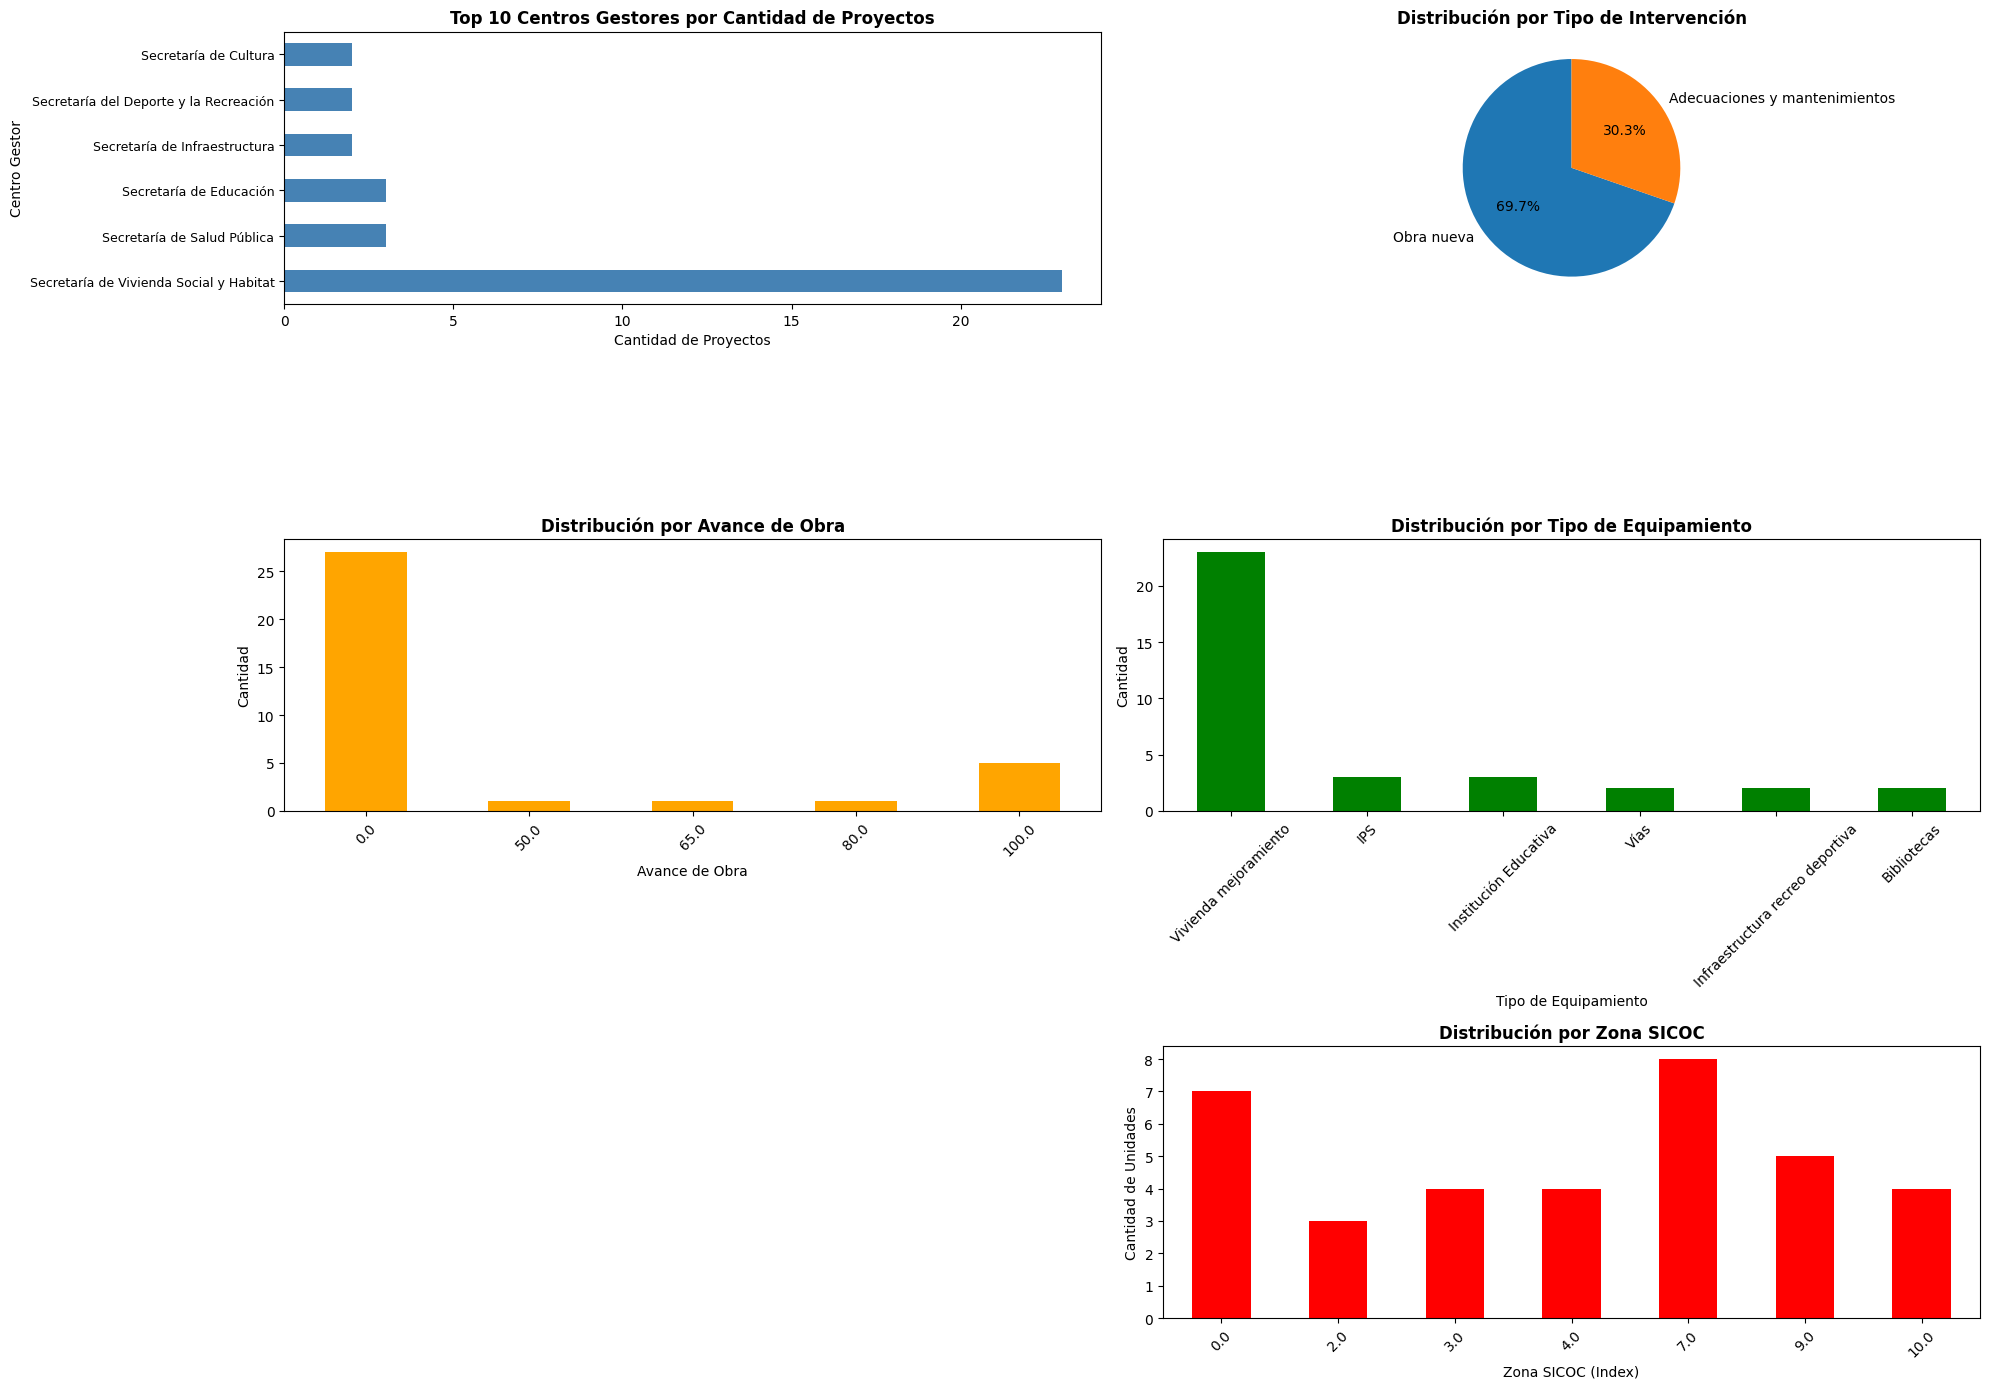


✓ Visualizaciones generadas y guardadas en: test_outputs/visualizaciones_reporte.png


In [107]:
# Crear visualizaciones del reporte
print("\n" + "=" * 100)
print("GENERANDO VISUALIZACIONES")
print("=" * 100)

# Crear figura con múltiples subplots
fig = plt.figure(figsize=(20, 14))

# 1. Gráfico de barras: Top 10 Centros Gestores
if 'nombre_centro_gestor' in tabla_atributos_geojson.columns:
    ax1 = plt.subplot(3, 2, 1)
    top_centros = tabla_atributos_geojson['nombre_centro_gestor'].value_counts().head(10)
    top_centros.plot(kind='barh', ax=ax1, color='steelblue')
    ax1.set_title('Top 10 Centros Gestores por Cantidad de Proyectos', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Cantidad de Proyectos')
    ax1.set_ylabel('Centro Gestor')
    plt.setp(ax1.get_yticklabels(), fontsize=9)

# 2. Gráfico de pastel: Tipo de Intervención
if 'tipo_intervencion' in tabla_atributos_geojson.columns:
    ax2 = plt.subplot(3, 2, 2)
    tipo_interv = tabla_atributos_geojson['tipo_intervencion'].value_counts()
    ax2.pie(tipo_interv.values, labels=tipo_interv.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Distribución por Tipo de Intervención', fontsize=12, fontweight='bold')

# 3. Gráfico de barras: Avance de Obra
if 'avance_obra' in tabla_atributos_geojson.columns:
    ax3 = plt.subplot(3, 2, 3)
    avance = tabla_atributos_geojson['avance_obra'].value_counts().sort_index()
    avance.plot(kind='bar', ax=ax3, color='orange')
    ax3.set_title('Distribución por Avance de Obra', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Avance de Obra')
    ax3.set_ylabel('Cantidad')
    ax3.tick_params(axis='x', rotation=45)

# 4. Gráfico de barras: Tipo de Equipamiento
if 'tipo_equipamiento' in tabla_atributos_geojson.columns:
    ax4 = plt.subplot(3, 2, 4)
    tipo_equip = tabla_atributos_geojson['tipo_equipamiento'].value_counts()
    tipo_equip.plot(kind='bar', ax=ax4, color='green')
    ax4.set_title('Distribución por Tipo de Equipamiento', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Tipo de Equipamiento')
    ax4.set_ylabel('Cantidad')
    ax4.tick_params(axis='x', rotation=45)

# 5. Gráfico de barras: Top 10 Comunas
if 'comuna' in tabla_atributos_geojson.columns:
    ax5 = plt.subplot(3, 2, 5)
    top_comunas = tabla_atributos_geojson['comuna'].value_counts().head(10)
    top_comunas.plot(kind='barh', ax=ax5, color='purple')
    ax5.set_title('Top 10 Comunas por Cantidad de Proyectos', fontsize=12, fontweight='bold')
    ax5.set_xlabel('Cantidad de Proyectos')
    ax5.set_ylabel('Comuna')

# 6. Gráfico de barras: Zonas SICOC
if 'index_right' in tabla_atributos_geojson.columns:
    ax6 = plt.subplot(3, 2, 6)
    zonas = tabla_atributos_geojson['index_right'].value_counts().sort_index()
    zonas.plot(kind='bar', ax=ax6, color='red')
    ax6.set_title('Distribución por Zona SICOC', fontsize=12, fontweight='bold')
    ax6.set_xlabel('Zona SICOC (Index)')
    ax6.set_ylabel('Cantidad de Unidades')
    ax6.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('test_outputs/visualizaciones_reporte.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualizaciones generadas y guardadas en: test_outputs/visualizaciones_reporte.png")

In [108]:
# Resumen final del reporte
print("\n" + "=" * 100)
print("RESUMEN FINAL DEL REPORTE")
print("=" * 100)

print(f"\n✅ ARCHIVOS GENERADOS:")
print(f"  1. {output_csv}")
print(f"  2. {output_resumen_csv}")
print(f"  3. {output_geojson}")
print(f"  4. {output_excel}")
print(f"  5. {output_reporte_excel}")
print(f"  6. test_outputs/visualizaciones_reporte.png")

print(f"\n📊 ESTADÍSTICAS CLAVE:")
print(f"  • Total de registros analizados: {len(tabla_atributos_geojson)}")
print(f"  • Total de columnas/variables: {len(tabla_atributos_geojson.columns)}")

if 'nombre_centro_gestor' in tabla_atributos_geojson.columns:
    print(f"  • Centros gestores únicos: {tabla_atributos_geojson['nombre_centro_gestor'].nunique()}")

if 'tipo_intervencion' in tabla_atributos_geojson.columns:
    print(f"  • Tipos de intervención únicos: {tabla_atributos_geojson['tipo_intervencion'].nunique()}")

if 'tipo_equipamiento' in tabla_atributos_geojson.columns:
    print(f"  • Tipos de equipamiento únicos: {tabla_atributos_geojson['tipo_equipamiento'].nunique()}")

if 'comuna' in tabla_atributos_geojson.columns:
    print(f"  • Comunas únicas: {tabla_atributos_geojson['comuna'].nunique()}")

if 'barrio' in tabla_atributos_geojson.columns:
    print(f"  • Barrios únicos: {tabla_atributos_geojson['barrio'].nunique()}")

col_presupuesto = [col for col in tabla_atributos_geojson.columns if 'presupuesto_base' in col.lower()]
if col_presupuesto:
    col_pres = col_presupuesto[0]
    total_pres = tabla_atributos_geojson[col_pres].sum()
    print(f"  • Presupuesto total: ${total_pres:,.2f}")

print(f"\n🎯 REPORTE COMPLETADO EXITOSAMENTE")
print("=" * 100)


RESUMEN FINAL DEL REPORTE

✅ ARCHIVOS GENERADOS:
  1. test_outputs\superposicion_espacial_completa.csv
  2. test_outputs\resumen_por_zona.csv
  3. test_outputs\superposicion_espacial_completa.geojson
  4. test_outputs\tabla_atributos_geojson_20251114_170635.xlsx
  5. test_outputs\reporte_completo_analisis.xlsx
  6. test_outputs/visualizaciones_reporte.png

📊 ESTADÍSTICAS CLAVE:
  • Total de registros analizados: 35
  • Total de columnas/variables: 23
  • Centros gestores únicos: 6
  • Tipos de intervención únicos: 2
  • Tipos de equipamiento únicos: 6
  • Presupuesto total: $3,257,613,002.00

🎯 REPORTE COMPLETADO EXITOSAMENTE


## 15. Exportar Capas en EPSG:4326 para ArcGIS y QGIS

In [109]:
# Crear directorio específico para exportaciones en EPSG:4326
export_4326_dir = Path("test_outputs/capas_epsg4326")
export_4326_dir.mkdir(parents=True, exist_ok=True)

# Subdirectorios por formato
shp_4326_dir = export_4326_dir / "shapefile"
kml_4326_dir = export_4326_dir / "kml"
kmz_4326_dir = export_4326_dir / "kmz"
geojson_4326_dir = export_4326_dir / "geojson"

for directory in [shp_4326_dir, kml_4326_dir, kmz_4326_dir, geojson_4326_dir]:
    directory.mkdir(parents=True, exist_ok=True)

print("=" * 100)
print("EXPORTACIÓN DE CAPAS EN EPSG:4326 (WGS84)")
print("=" * 100)
print(f"\n📁 Directorio de exportación: {export_4326_dir}")
print(f"\n🗺️ Sistema de coordenadas objetivo: EPSG:4326 (WGS84)")
print(f"   - Estándar mundial para GPS")
print(f"   - Compatible con Google Earth, web mapping")
print(f"   - Lectura perfecta en ArcGIS y QGIS")

EXPORTACIÓN DE CAPAS EN EPSG:4326 (WGS84)

📁 Directorio de exportación: test_outputs\capas_epsg4326

🗺️ Sistema de coordenadas objetivo: EPSG:4326 (WGS84)
   - Estándar mundial para GPS
   - Compatible con Google Earth, web mapping
   - Lectura perfecta en ArcGIS y QGIS


In [110]:
# Reproyectar todas las capas a EPSG:4326
print("\n" + "=" * 100)
print("🔄 REPROYECTANDO CAPAS A EPSG:4326")
print("=" * 100)

# Verificar y reproyectar cada capa
capas_4326 = {}

# Capa 1: ZONAS SICOC
print(f"\n1️⃣ ZONAS SICOC")
print(f"   CRS original: {gdf_zonas.crs}")
if gdf_zonas.crs.to_epsg() != 4326:
    zonas_epsg4326 = gdf_zonas.to_crs(epsg=4326)
    print(f"   ✓ Reproyectada a EPSG:4326")
else:
    zonas_epsg4326 = gdf_zonas.copy()
    print(f"   ✓ Ya está en EPSG:4326")
print(f"   Registros: {len(zonas_epsg4326)}")
capas_4326['ZONAS_SICOC'] = zonas_epsg4326

# Capa 2: Unidades Proyecto
print(f"\n2️⃣ UNIDADES PROYECTO")
print(f"   CRS original: {gdf_unidades.crs}")
if gdf_unidades.crs.to_epsg() != 4326:
    unidades_epsg4326 = gdf_unidades.to_crs(epsg=4326)
    print(f"   ✓ Reproyectada a EPSG:4326")
else:
    unidades_epsg4326 = gdf_unidades.copy()
    print(f"   ✓ Ya está en EPSG:4326")
print(f"   Registros: {len(unidades_epsg4326)}")
capas_4326['Unidades_Proyecto'] = unidades_epsg4326

# Capa 3: Superposición Espacial
print(f"\n3️⃣ SUPERPOSICIÓN ESPACIAL")
print(f"   CRS original: {overlay_geojson.crs}")
if overlay_geojson.crs.to_epsg() != 4326:
    overlay_epsg4326 = overlay_geojson.to_crs(epsg=4326)
    print(f"   ✓ Reproyectada a EPSG:4326")
else:
    overlay_epsg4326 = overlay_geojson.copy()
    print(f"   ✓ Ya está en EPSG:4326")
print(f"   Registros: {len(overlay_epsg4326)}")
capas_4326['Superposicion_Espacial'] = overlay_epsg4326

print(f"\n✅ {len(capas_4326)} capas reproyectadas exitosamente a EPSG:4326")


🔄 REPROYECTANDO CAPAS A EPSG:4326

1️⃣ ZONAS SICOC
   CRS original: EPSG:4326
   ✓ Ya está en EPSG:4326
   Registros: 11

2️⃣ UNIDADES PROYECTO
   CRS original: EPSG:4326
   ✓ Ya está en EPSG:4326
   Registros: 1246

3️⃣ SUPERPOSICIÓN ESPACIAL
   CRS original: EPSG:4326
   ✓ Ya está en EPSG:4326
   Registros: 35

✅ 3 capas reproyectadas exitosamente a EPSG:4326


In [111]:
# EXPORTAR A SHAPEFILE EN EPSG:4326
print("\n" + "=" * 100)
print("📦 EXPORTANDO SHAPEFILES EN EPSG:4326")
print("=" * 100)

shapefiles_exportados = []
geometrias_excluidas = []

for nombre_capa, gdf_capa in capas_4326.items():
    # Filtrar GeometryCollection ya que Shapefile no las soporta
    gdf_valido = gdf_capa[gdf_capa.geometry.type != 'GeometryCollection'].copy()
    gdf_excluido = gdf_capa[gdf_capa.geometry.type == 'GeometryCollection'].copy()
    
    if len(gdf_excluido) > 0:
        print(f"\n⚠ {nombre_capa}: {len(gdf_excluido)} GeometryCollection(s) excluidas (no soportadas por Shapefile)")
        geometrias_excluidas.append((nombre_capa, len(gdf_excluido)))
    
    if len(gdf_valido) == 0:
        print(f"\n⚠ {nombre_capa}: No hay geometrías válidas para exportar a Shapefile")
        continue
    
    # Identificar tipos de geometría únicos (sin GeometryCollection)
    geom_types = gdf_valido.geometry.type.unique()
    
    if len(geom_types) == 1:
        # Solo un tipo de geometría, exportar directamente
        shapefile_path = shp_4326_dir / f"{nombre_capa}_EPSG4326.shp"
        gdf_valido.to_file(shapefile_path, driver='ESRI Shapefile', encoding='utf-8')
        shapefiles_exportados.append(shapefile_path)
        
        print(f"\n✓ {nombre_capa}")
        print(f"  📍 {shapefile_path}")
        print(f"  📊 Registros: {len(gdf_valido)}")
        print(f"  🗺️ CRS: EPSG:{gdf_valido.crs.to_epsg()}")
        print(f"  📐 Tipo de geometría: {geom_types[0]}")
        print(f"  📦 Archivos: .shp, .shx, .dbf, .prj, .cpg")
    else:
        # Múltiples tipos de geometría, exportar por separado
        print(f"\n⚠ {nombre_capa} contiene múltiples tipos de geometría: {list(geom_types)}")
        print(f"   Exportando por tipo de geometría...")
        
        for geom_type in geom_types:
            gdf_filtered = gdf_valido[gdf_valido.geometry.type == geom_type].copy()
            shapefile_path = shp_4326_dir / f"{nombre_capa}_{geom_type}_EPSG4326.shp"
            
            gdf_filtered.to_file(shapefile_path, driver='ESRI Shapefile', encoding='utf-8')
            shapefiles_exportados.append(shapefile_path)
            
            print(f"\n  ✓ {nombre_capa} ({geom_type})")
            print(f"    📍 {shapefile_path}")
            print(f"    📊 Registros: {len(gdf_filtered)}")
            print(f"    🗺️ CRS: EPSG:{gdf_filtered.crs.to_epsg()}")
            print(f"    📐 Tipo de geometría: {geom_type}")

print(f"\n✅ Total de shapefiles exportados: {len(shapefiles_exportados)}")

if geometrias_excluidas:
    print(f"\n⚠ GEOMETRÍAS EXCLUIDAS (GeometryCollection no soportada por Shapefile):")
    for nombre, cantidad in geometrias_excluidas:
        print(f"   • {nombre}: {cantidad} geometrías")
    print(f"\n💡 Sugerencia: Las GeometryCollection están disponibles en los archivos GeoJSON")

print(f"\n💡 Compatible con:")
print(f"   ✓ ArcGIS Desktop / ArcGIS Pro")
print(f"   ✓ QGIS 3.x")
print(f"   ✓ AutoCAD Map 3D")
print(f"   ✓ Global Mapper")
print(f"   ✓ Cualquier software GIS estándar")


📦 EXPORTANDO SHAPEFILES EN EPSG:4326

✓ ZONAS_SICOC
  📍 test_outputs\capas_epsg4326\shapefile\ZONAS_SICOC_EPSG4326.shp
  📊 Registros: 11
  🗺️ CRS: EPSG:4326
  📐 Tipo de geometría: Polygon
  📦 Archivos: .shp, .shx, .dbf, .prj, .cpg

⚠ Unidades_Proyecto: 27 GeometryCollection(s) excluidas (no soportadas por Shapefile)

⚠ Unidades_Proyecto contiene múltiples tipos de geometría: ['Point', 'LineString', 'MultiLineString']
   Exportando por tipo de geometría...

  ✓ Unidades_Proyecto (Point)
    📍 test_outputs\capas_epsg4326\shapefile\Unidades_Proyecto_Point_EPSG4326.shp
    📊 Registros: 1020
    🗺️ CRS: EPSG:4326
    📐 Tipo de geometría: Point

  ✓ Unidades_Proyecto (LineString)
    📍 test_outputs\capas_epsg4326\shapefile\Unidades_Proyecto_LineString_EPSG4326.shp
    📊 Registros: 157
    🗺️ CRS: EPSG:4326
    📐 Tipo de geometría: LineString

  ✓ Unidades_Proyecto (MultiLineString)
    📍 test_outputs\capas_epsg4326\shapefile\Unidades_Proyecto_MultiLineString_EPSG4326.shp
    📊 Registros: 42

C:\Users\juanp\AppData\Local\Temp\ipykernel_17580\2098842013.py:46: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_filtered.to_file(shapefile_path, driver='ESRI Shapefile', encoding='utf-8')
c:\Users\juanp\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'has_valid_geometry' to 'has_valid_'
  ogr_write(
c:\Users\juanp\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'comuna_corregimiento' to 'comuna_cor'
  ogr_write(
c:\Users\juanp\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'barrio_vereda' to 'barrio_ver'
  ogr_write(
c:\Users\juanp\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'presupuesto_base' to 'presupuest'
  ogr_write(
c:\Users\juanp\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field n

In [112]:
# EXPORTAR A GEOJSON EN EPSG:4326
print("\n" + "=" * 100)
print("🗺️ EXPORTANDO GEOJSON EN EPSG:4326")
print("=" * 100)

geojson_exportados = []

for nombre_capa, gdf_capa in capas_4326.items():
    geojson_path = geojson_4326_dir / f"{nombre_capa}_EPSG4326.geojson"
    
    # Exportar a GeoJSON
    gdf_capa.to_file(geojson_path, driver='GeoJSON')
    geojson_exportados.append(geojson_path)
    
    file_size = geojson_path.stat().st_size / 1024  # KB
    
    print(f"\n✓ {nombre_capa}")
    print(f"  📍 {geojson_path}")
    print(f"  📊 Registros: {len(gdf_capa)}")
    print(f"  🗺️ CRS: EPSG:{gdf_capa.crs.to_epsg()}")
    print(f"  📦 Tamaño: {file_size:.2f} KB")

print(f"\n✅ Total de archivos GeoJSON exportados: {len(geojson_exportados)}")
print(f"\n💡 Compatible con:")
print(f"   ✓ QGIS 3.x")
print(f"   ✓ ArcGIS Pro")
print(f"   ✓ Leaflet / Mapbox / OpenLayers")
print(f"   ✓ Python (GeoPandas, Folium)")
print(f"   ✓ R (sf package)")
print(f"   ✓ APIs y aplicaciones web")


🗺️ EXPORTANDO GEOJSON EN EPSG:4326

✓ ZONAS_SICOC
  📍 test_outputs\capas_epsg4326\geojson\ZONAS_SICOC_EPSG4326.geojson
  📊 Registros: 11
  🗺️ CRS: EPSG:4326
  📦 Tamaño: 5.48 KB

✓ Unidades_Proyecto
  📍 test_outputs\capas_epsg4326\geojson\Unidades_Proyecto_EPSG4326.geojson
  📊 Registros: 1246
  🗺️ CRS: EPSG:4326
  📦 Tamaño: 916.48 KB

✓ Superposicion_Espacial
  📍 test_outputs\capas_epsg4326\geojson\Superposicion_Espacial_EPSG4326.geojson
  📊 Registros: 35
  🗺️ CRS: EPSG:4326
  📦 Tamaño: 30.09 KB

✅ Total de archivos GeoJSON exportados: 3

💡 Compatible con:
   ✓ QGIS 3.x
   ✓ ArcGIS Pro
   ✓ Leaflet / Mapbox / OpenLayers
   ✓ Python (GeoPandas, Folium)
   ✓ R (sf package)
   ✓ APIs y aplicaciones web


In [113]:
# EXPORTAR A KML EN EPSG:4326
print("\n" + "=" * 100)
print("🌍 EXPORTANDO KML EN EPSG:4326")
print("=" * 100)

kml_exportados = []
kml_errores = []

for nombre_capa, gdf_capa in capas_4326.items():
    kml_path = kml_4326_dir / f"{nombre_capa}_EPSG4326.kml"
    
    try:
        # Exportar a KML (requiere EPSG:4326)
        gdf_capa.to_file(kml_path, driver='KML')
        kml_exportados.append(kml_path)
        
        file_size = kml_path.stat().st_size / 1024  # KB
        
        print(f"\n✓ {nombre_capa}")
        print(f"  📍 {kml_path}")
        print(f"  📊 Registros: {len(gdf_capa)}")
        print(f"  🗺️ CRS: EPSG:{gdf_capa.crs.to_epsg()}")
        print(f"  📦 Tamaño: {file_size:.2f} KB")
        
    except Exception as e:
        kml_errores.append((nombre_capa, str(e)))
        print(f"\n⚠ {nombre_capa}")
        print(f"  Error: {e}")

if kml_exportados:
    print(f"\n✅ Total de archivos KML exportados: {len(kml_exportados)}")
    print(f"\n💡 Compatible con:")
    print(f"   ✓ Google Earth")
    print(f"   ✓ Google Maps")
    print(f"   ✓ QGIS 3.x")
    print(f"   ✓ ArcGIS Pro")
    print(f"   ✓ NASA World Wind")
else:
    print(f"\n⚠ No se pudieron exportar archivos KML")
    print(f"   El driver KML puede no estar disponible en tu instalación de GDAL")

if kml_errores:
    print(f"\n⚠ Errores encontrados: {len(kml_errores)}")


🌍 EXPORTANDO KML EN EPSG:4326

✓ ZONAS_SICOC
  📍 test_outputs\capas_epsg4326\kml\ZONAS_SICOC_EPSG4326.kml
  📊 Registros: 11
  🗺️ CRS: EPSG:4326
  📦 Tamaño: 8.66 KB

✓ Unidades_Proyecto
  📍 test_outputs\capas_epsg4326\kml\Unidades_Proyecto_EPSG4326.kml
  📊 Registros: 1246
  🗺️ CRS: EPSG:4326
  📦 Tamaño: 1381.05 KB

✓ Superposicion_Espacial
  📍 test_outputs\capas_epsg4326\kml\Superposicion_Espacial_EPSG4326.kml
  📊 Registros: 35
  🗺️ CRS: EPSG:4326
  📦 Tamaño: 49.79 KB

✅ Total de archivos KML exportados: 3

💡 Compatible con:
   ✓ Google Earth
   ✓ Google Maps
   ✓ QGIS 3.x
   ✓ ArcGIS Pro
   ✓ NASA World Wind


c:\Users\juanp\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Invalid value 'COMUNA 02' for boolean field Unidades_Proyecto_EPSG4326.has_valid_geometry. Assuming it to be false.
  ogr_write(
c:\Users\juanp\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 'Adecuaciones y mantenimientos' of field Unidades_Proyecto_EPSG4326.avance_obra parsed incompletely to real 0.
  ogr_write(
c:\Users\juanp\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Invalid value 'COMUNA 03' for boolean field Unidades_Proyecto_EPSG4326.has_valid_geometry. Assuming it to be false.
  ogr_write(
c:\Users\juanp\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Invalid value 'COMUNA 11' for boolean field Unidades_Proyecto_EPSG4326.has_valid_geometry. Assuming it to be false.
  ogr_write(
c:\Users\juanp\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Invalid value 'COMUNA 10' for boolean field Unidades_Proyecto_EPSG4326.has_valid_geometr

In [114]:
# EXPORTAR A KMZ EN EPSG:4326 (comprimir archivos KML)
print("\n" + "=" * 100)
print("📦 EXPORTANDO KMZ EN EPSG:4326")
print("=" * 100)

import zipfile

kmz_exportados = []

if kml_exportados:
    print(f"\n🔄 Comprimiendo archivos KML a KMZ...")
    
    for kml_file in kml_exportados:
        kmz_file = kmz_4326_dir / kml_file.name.replace('.kml', '.kmz')
        
        try:
            # Crear archivo KMZ (KML comprimido en ZIP)
            with zipfile.ZipFile(kmz_file, 'w', zipfile.ZIP_DEFLATED) as kmz:
                kmz.write(kml_file, arcname=kml_file.name)
            
            kmz_exportados.append(kmz_file)
            
            file_size = kmz_file.stat().st_size / 1024  # KB
            
            print(f"\n✓ {kml_file.stem.replace('_EPSG4326', '')}")
            print(f"  📍 {kmz_file}")
            print(f"  📦 Tamaño: {file_size:.2f} KB")
            print(f"  🗜️ Compresión: {(1 - file_size / (kml_file.stat().st_size / 1024)) * 100:.1f}%")
            
        except Exception as e:
            print(f"\n⚠ Error al crear KMZ para {kml_file.name}: {e}")
    
    if kmz_exportados:
        print(f"\n✅ Total de archivos KMZ exportados: {len(kmz_exportados)}")
        print(f"\n💡 Compatible con:")
        print(f"   ✓ Google Earth (formato preferido)")
        print(f"   ✓ Google Maps")
        print(f"   ✓ Aplicaciones móviles de mapas")
        print(f"\n💾 Ventajas de KMZ:")
        print(f"   • Archivos más pequeños (comprimidos)")
        print(f"   • Fáciles de compartir por email")
        print(f"   • Pueden incluir imágenes y recursos")
else:
    print(f"\n⚠ No hay archivos KML disponibles para comprimir a KMZ")


📦 EXPORTANDO KMZ EN EPSG:4326

🔄 Comprimiendo archivos KML a KMZ...

✓ ZONAS_SICOC
  📍 test_outputs\capas_epsg4326\kmz\ZONAS_SICOC_EPSG4326.kmz
  📦 Tamaño: 1.91 KB
  🗜️ Compresión: 77.9%

✓ Unidades_Proyecto
  📍 test_outputs\capas_epsg4326\kmz\Unidades_Proyecto_EPSG4326.kmz
  📦 Tamaño: 88.53 KB
  🗜️ Compresión: 93.6%

✓ Superposicion_Espacial
  📍 test_outputs\capas_epsg4326\kmz\Superposicion_Espacial_EPSG4326.kmz
  📦 Tamaño: 3.84 KB
  🗜️ Compresión: 92.3%

✅ Total de archivos KMZ exportados: 3

💡 Compatible con:
   ✓ Google Earth (formato preferido)
   ✓ Google Maps
   ✓ Aplicaciones móviles de mapas

💾 Ventajas de KMZ:
   • Archivos más pequeños (comprimidos)
   • Fáciles de compartir por email
   • Pueden incluir imágenes y recursos


In [115]:
# RESUMEN FINAL DE EXPORTACIONES EN EPSG:4326
print("\n" + "=" * 100)
print("📊 RESUMEN DE EXPORTACIONES EN EPSG:4326")
print("=" * 100)

def listar_archivos_por_formato(directorio, extension):
    """Lista archivos con extensión específica en un directorio"""
    return list(Path(directorio).glob(f"*.{extension}"))

print(f"\n📁 Directorio principal: {export_4326_dir}")
print(f"\n🗺️ Sistema de Coordenadas: EPSG:4326 (WGS84)")
print(f"   • Datum: World Geodetic System 1984")
print(f"   • Tipo: Geográfico (lat/lon)")
print(f"   • Unidades: Grados decimales")

print(f"\n" + "=" * 100)
print("FORMATOS EXPORTADOS:")
print("=" * 100)

# Shapefile
shp_files = listar_archivos_por_formato(shp_4326_dir, "shp")
print(f"\n1️⃣ SHAPEFILE (.shp)")
print(f"   📂 {shp_4326_dir}")
print(f"   📄 {len(shp_files)} capas exportadas")
if shp_files:
    for shp in shp_files:
        print(f"      • {shp.name}")
print(f"   ✓ Compatible con: ArcGIS Desktop, ArcGIS Pro, QGIS, AutoCAD Map")

# GeoJSON
geojson_files = listar_archivos_por_formato(geojson_4326_dir, "geojson")
print(f"\n2️⃣ GEOJSON (.geojson)")
print(f"   📂 {geojson_4326_dir}")
print(f"   📄 {len(geojson_files)} archivos exportados")
if geojson_files:
    for gj in geojson_files:
        print(f"      • {gj.name}")
print(f"   ✓ Compatible con: QGIS, ArcGIS Pro, Web GIS, Python, R, JavaScript")

# KML
kml_files = listar_archivos_por_formato(kml_4326_dir, "kml")
print(f"\n3️⃣ KML (.kml)")
print(f"   📂 {kml_4326_dir}")
print(f"   📄 {len(kml_files)} archivos exportados")
if kml_files:
    for kml in kml_files:
        print(f"      • {kml.name}")
    print(f"   ✓ Compatible con: Google Earth, QGIS, ArcGIS Pro")
else:
    print(f"   ⚠ No se exportaron archivos KML (driver no disponible)")

# KMZ
kmz_files = listar_archivos_por_formato(kmz_4326_dir, "kmz")
print(f"\n4️⃣ KMZ (.kmz)")
print(f"   📂 {kmz_4326_dir}")
print(f"   📄 {len(kmz_files)} archivos exportados")
if kmz_files:
    for kmz in kmz_files:
        print(f"      • {kmz.name}")
    print(f"   ✓ Compatible con: Google Earth, Google Maps")
else:
    print(f"   ⚠ No se exportaron archivos KMZ")

# Total
total_archivos = len(shp_files) + len(geojson_files) + len(kml_files) + len(kmz_files)
print(f"\n" + "=" * 100)
print(f"✅ EXPORTACIÓN COMPLETADA")
print(f"   • Total de archivos principales: {total_archivos}")
print(f"   • Capas por formato: {len(capas_4326)}")
print(f"   • Sistema de coordenadas: EPSG:4326 garantizado")
print("=" * 100)


📊 RESUMEN DE EXPORTACIONES EN EPSG:4326

📁 Directorio principal: test_outputs\capas_epsg4326

🗺️ Sistema de Coordenadas: EPSG:4326 (WGS84)
   • Datum: World Geodetic System 1984
   • Tipo: Geográfico (lat/lon)
   • Unidades: Grados decimales

FORMATOS EXPORTADOS:

1️⃣ SHAPEFILE (.shp)
   📂 test_outputs\capas_epsg4326\shapefile
   📄 8 capas exportadas
      • Superposicion_Espacial_LineString_EPSG4326.shp
      • Superposicion_Espacial_MultiLineString_EPSG4326.shp
      • Superposicion_Espacial_Point_EPSG4326.shp
      • Unidades_Proyecto_EPSG4326.shp
      • Unidades_Proyecto_LineString_EPSG4326.shp
      • Unidades_Proyecto_MultiLineString_EPSG4326.shp
      • Unidades_Proyecto_Point_EPSG4326.shp
      • ZONAS_SICOC_EPSG4326.shp
   ✓ Compatible con: ArcGIS Desktop, ArcGIS Pro, QGIS, AutoCAD Map

2️⃣ GEOJSON (.geojson)
   📂 test_outputs\capas_epsg4326\geojson
   📄 3 archivos exportados
      • Superposicion_Espacial_EPSG4326.geojson
      • Unidades_Proyecto_EPSG4326.geojson
      • Z

In [116]:
# CREAR README PARA CAPAS EN EPSG:4326
readme_4326_content = """# Capas Geoespaciales en EPSG:4326 (WGS84)

## 🌍 Sistema de Coordenadas

**EPSG:4326 - WGS84 (World Geodetic System 1984)**
- **Tipo**: Sistema de coordenadas geográficas
- **Unidades**: Grados decimales (latitud/longitud)
- **Datum**: WGS84
- **Uso**: Estándar mundial para GPS, Google Earth, mapas web

## 📁 Estructura de Carpetas

```
capas_epsg4326/
├── shapefile/          # Archivos ESRI Shapefile en EPSG:4326
│   ├── ZONAS_SICOC_EPSG4326.*
│   ├── Unidades_Proyecto_EPSG4326.*
│   └── Superposicion_Espacial_EPSG4326.*
├── geojson/            # Archivos GeoJSON en EPSG:4326
│   ├── ZONAS_SICOC_EPSG4326.geojson
│   ├── Unidades_Proyecto_EPSG4326.geojson
│   └── Superposicion_Espacial_EPSG4326.geojson
├── kml/                # Archivos KML en EPSG:4326
│   ├── ZONAS_SICOC_EPSG4326.kml
│   ├── Unidades_Proyecto_EPSG4326.kml
│   └── Superposicion_Espacial_EPSG4326.kml
└── kmz/                # Archivos KMZ en EPSG:4326
    ├── ZONAS_SICOC_EPSG4326.kmz
    ├── Unidades_Proyecto_EPSG4326.kmz
    └── Superposicion_Espacial_EPSG4326.kmz
```

## 🗺️ Capas Disponibles

### 1. ZONAS_SICOC_EPSG4326
- **Descripción**: Polígonos de zonas SICOC
- **Tipo de geometría**: Polígono
- **CRS**: EPSG:4326 (WGS84)
- **Formatos**: .shp, .geojson, .kml, .kmz

### 2. Unidades_Proyecto_EPSG4326
- **Descripción**: Unidades de proyecto
- **Tipo de geometría**: Punto/Polígono
- **CRS**: EPSG:4326 (WGS84)
- **Formatos**: .shp, .geojson, .kml, .kmz

### 3. Superposicion_Espacial_EPSG4326
- **Descripción**: Resultado del análisis de superposición espacial
- **Tipo de geometría**: Punto/Polígono
- **CRS**: EPSG:4326 (WGS84)
- **Contiene**: Atributos de unidades + información de zonas SICOC
- **Formatos**: .shp, .geojson, .kml, .kmz

## 🔧 Guía de Uso

### En ArcGIS Desktop / ArcGIS Pro

1. **Abrir ArcGIS**
2. **Agregar datos**:
   - Clic en "Add Data" o arrastra el archivo
   - Navega a la carpeta `shapefile/` o `geojson/`
   - Selecciona el archivo `.shp` o `.geojson`
3. **El CRS se detectará automáticamente como EPSG:4326**
4. **Para KML**: Usar herramienta "KML to Layer"

### En QGIS

1. **Abrir QGIS**
2. **Agregar capa**:
   - Método 1: Arrastra cualquier archivo al lienzo
   - Método 2: Layer → Add Layer → Add Vector Layer
3. **Formatos soportados**:
   - ✓ Shapefile (.shp)
   - ✓ GeoJSON (.geojson)
   - ✓ KML (.kml)
   - ✓ KMZ (.kmz)
4. **El CRS EPSG:4326 se reconocerá automáticamente**

### En Google Earth

1. **Abrir Google Earth**
2. **File → Open**
3. **Seleccionar archivo**:
   - `.kml` (recomendado)
   - `.kmz` (más compacto)
4. **La capa se visualizará directamente en el globo 3D**

## 📊 Características del CRS EPSG:4326

### ✅ Ventajas
- Estándar mundial universalmente reconocido
- Compatible con GPS y navegación
- Perfecto para mapas web y aplicaciones móviles
- No requiere reproyección para Google Earth/Maps
- Coordenadas fáciles de entender (lat/lon)

### ⚠️ Consideraciones
- Las distancias en grados no son uniformes
- Para análisis de distancias, considerar usar proyecciones UTM
- Los ángulos y áreas pueden distorsionarse en latitudes extremas

## 🎯 Casos de Uso Recomendados

- ✅ Visualización en Google Earth
- ✅ Mapas web (Leaflet, Mapbox, OpenLayers)
- ✅ Integración con servicios de mapas online
- ✅ Compartir datos con GPS
- ✅ Aplicaciones móviles de ubicación
- ✅ Interoperabilidad entre diferentes sistemas GIS

## 📝 Verificación del CRS

### En ArcGIS Pro
1. Click derecho en la capa → Properties
2. Ir a "Source" tab
3. Verificar "Spatial Reference": WGS 1984 (EPSG:4326)

### En QGIS
1. Click derecho en la capa → Properties
2. Ir a pestaña "Information"
3. Buscar "CRS": EPSG:4326 - WGS 84

### Usando Python (GeoPandas)
```python
import geopandas as gpd

# Leer shapefile
gdf = gpd.read_file("shapefile/ZONAS_SICOC_EPSG4326.shp")

# Verificar CRS
print(gdf.crs)  # Debe mostrar: EPSG:4326
print(gdf.crs.to_epsg())  # Debe mostrar: 4326
```

## 💾 Tamaño de Archivos

- **Shapefile**: Incluye múltiples archivos (.shp, .shx, .dbf, .prj, .cpg)
- **GeoJSON**: Archivo único, formato texto (más grande)
- **KML**: Archivo único, formato XML
- **KMZ**: Archivo comprimido (más pequeño que KML)

**Recomendación**: Usar KMZ para compartir por email o transferencias rápidas.

## 🆘 Solución de Problemas

### El archivo no se visualiza correctamente
- Verificar que todos los archivos del shapefile estén presentes
- Confirmar que el software GIS soporta el formato
- Revisar que la extensión del archivo sea correcta

### El CRS no se reconoce automáticamente
- Los archivos incluyen archivo .prj con la definición del CRS
- Manualmente seleccionar EPSG:4326 si es necesario
- En QGIS: Click derecho → Set CRS → Buscar "4326"

### Archivos KML/KMZ no se abren
- Verificar que Google Earth esté instalado
- Probar abrir con QGIS como alternativa
- Los archivos deben tener extensión .kml o .kmz

## 📞 Información Adicional

Para más detalles sobre el análisis espacial realizado, consultar:
- Notebook Jupyter: `analisis_superposicion_espacial.ipynb`
- Reportes Excel en: `test_outputs/`

---
**Fecha de generación**: 2025-11-14
**Sistema de coordenadas garantizado**: EPSG:4326 (WGS84)
"""

readme_4326_path = export_4326_dir / "README.md"
readme_4326_path.write_text(readme_4326_content, encoding='utf-8')

print(f"\n📝 README creado exitosamente")
print(f"   📍 {readme_4326_path}")
print(f"\n📚 El README incluye:")
print(f"   • Descripción del sistema de coordenadas EPSG:4326")
print(f"   • Guías de uso para ArcGIS, QGIS y Google Earth")
print(f"   • Información detallada de cada capa")
print(f"   • Instrucciones de verificación del CRS")
print(f"   • Solución de problemas comunes")
print(f"   • Ejemplos de código Python")


📝 README creado exitosamente
   📍 test_outputs\capas_epsg4326\README.md

📚 El README incluye:
   • Descripción del sistema de coordenadas EPSG:4326
   • Guías de uso para ArcGIS, QGIS y Google Earth
   • Información detallada de cada capa
   • Instrucciones de verificación del CRS
   • Solución de problemas comunes
   • Ejemplos de código Python


## 16. Revisar Coordenadas del Shapefile Unidades de Proyecto

In [ ]:
# Verificar coordenadas del shapefile Unidades_Proyecto exportado
print("=" * 100)
print("REVISIÓN DE COORDENADAS - UNIDADES DE PROYECTO")
print("=" * 100)

# Revisar el shapefile exportado en EPSG:4326
shapefile_unidades_4326 = shp_4326_dir / "Unidades_Proyecto_EPSG4326.shp"

if shapefile_unidades_4326.exists():
    print(f"\n📍 Leyendo shapefile: {shapefile_unidades_4326}")
    
    # Leer el shapefile
    gdf_check = gpd.read_file(shapefile_unidades_4326)
    
    print(f"\n🗺️ INFORMACIÓN DEL SISTEMA DE COORDENADAS:")
    print(f"   • CRS: {gdf_check.crs}")
    print(f"   • Código EPSG: {gdf_check.crs.to_epsg()}")
    print(f"   • Nombre: {gdf_check.crs.name if hasattr(gdf_check.crs, 'name') else 'N/A'}")
    print(f"   • Tipo: {gdf_check.crs.type_name if hasattr(gdf_check.crs, 'type_name') else 'N/A'}")
    
    print(f"\n📊 INFORMACIÓN GENERAL:")
    print(f"   • Total de registros: {len(gdf_check)}")
    print(f"   • Tipo de geometría: {gdf_check.geometry.type.unique()}")
    
    print(f"\n📐 EXTENSIÓN GEOGRÁFICA (BBOX):")
    bounds = gdf_check.total_bounds
    print(f"   • Longitud mínima: {bounds[0]:.6f}°")
    print(f"   • Latitud mínima: {bounds[1]:.6f}°")
    print(f"   • Longitud máxima: {bounds[2]:.6f}°")
    print(f"   • Latitud máxima: {bounds[3]:.6f}°")
    
    # Verificar si las coordenadas están en el rango válido para EPSG:4326
    print(f"\n✅ VALIDACIÓN DE COORDENADAS:")
    lon_valida = -180 <= bounds[0] <= 180 and -180 <= bounds[2] <= 180
    lat_valida = -90 <= bounds[1] <= 90 and -90 <= bounds[3] <= 90
    
    if lon_valida and lat_valida:
        print(f"   ✓ Las coordenadas están en el rango válido para EPSG:4326")
        print(f"     - Longitud: entre -180° y 180° ✓")
        print(f"     - Latitud: entre -90° y 90° ✓")
    else:
        print(f"   ⚠ ADVERTENCIA: Las coordenadas están fuera del rango esperado")
        if not lon_valida:
            print(f"     - Longitud fuera de rango (-180° a 180°)")
        if not lat_valida:
            print(f"     - Latitud fuera de rango (-90° a 90°)")
    
    # Mostrar coordenadas de las primeras 5 geometrías
    print(f"\n📍 COORDENADAS DE LAS PRIMERAS 5 GEOMETRÍAS:")
    for idx in range(min(5, len(gdf_check))):
        geom = gdf_check.geometry.iloc[idx]
        
        if geom.geom_type == 'Point':
            print(f"   {idx + 1}. Punto")
            print(f"      - Longitud: {geom.x:.6f}°")
            print(f"      - Latitud: {geom.y:.6f}°")
        elif geom.geom_type in ['Polygon', 'MultiPolygon']:
            centroid = geom.centroid
            print(f"   {idx + 1}. {geom.geom_type}")
            print(f"      - Centroide Longitud: {centroid.x:.6f}°")
            print(f"      - Centroide Latitud: {centroid.y:.6f}°")
            print(f"      - Área aproximada: {geom.area:.8f} grados²")
        else:
            print(f"   {idx + 1}. {geom.geom_type}")
            print(f"      - Bounds: {geom.bounds}")
    
    # Estadísticas de coordenadas
    print(f"\n📈 ESTADÍSTICAS DE COORDENADAS:")
    
    # Extraer coordenadas según tipo de geometría
    if gdf_check.geometry.type.iloc[0] == 'Point':
        lons = gdf_check.geometry.x
        lats = gdf_check.geometry.y
        
        print(f"   LONGITUDES:")
        print(f"      - Mínima: {lons.min():.6f}°")
        print(f"      - Máxima: {lons.max():.6f}°")
        print(f"      - Promedio: {lons.mean():.6f}°")
        print(f"      - Mediana: {lons.median():.6f}°")
        
        print(f"   LATITUDES:")
        print(f"      - Mínima: {lats.min():.6f}°")
        print(f"      - Máxima: {lats.max():.6f}°")
        print(f"      - Promedio: {lats.mean():.6f}°")
        print(f"      - Mediana: {lats.median():.6f}°")
    else:
        # Para polígonos, usar centroides
        centroids = gdf_check.geometry.centroid
        lons = centroids.x
        lats = centroids.y
        
        print(f"   CENTROIDES - LONGITUDES:")
        print(f"      - Mínima: {lons.min():.6f}°")
        print(f"      - Máxima: {lons.max():.6f}°")
        print(f"      - Promedio: {lons.mean():.6f}°")
        
        print(f"   CENTROIDES - LATITUDES:")
        print(f"      - Mínima: {lats.min():.6f}°")
        print(f"      - Máxima: {lats.max():.6f}°")
        print(f"      - Promedio: {lats.mean():.6f}°")
    
    # Verificar ubicación aproximada (Colombia)
    print(f"\n🌎 VERIFICACIÓN DE UBICACIÓN:")
    # Colombia está aproximadamente entre:
    # Longitud: -79° a -66°
    # Latitud: -4° a 13°
    
    lon_colombia = -79 <= lons.mean() <= -66
    lat_colombia = -4 <= lats.mean() <= 13
    
    if lon_colombia and lat_colombia:
        print(f"   ✓ Las coordenadas promedio corresponden a Colombia")
        print(f"     - Longitud promedio: {lons.mean():.6f}° (rango Colombia: -79° a -66°)")
        print(f"     - Latitud promedio: {lats.mean():.6f}° (rango Colombia: -4° a 13°)")
    else:
        print(f"   ⚠ Las coordenadas promedio NO corresponden a Colombia")
        print(f"     - Longitud promedio: {lons.mean():.6f}°")
        print(f"     - Latitud promedio: {lats.mean():.6f}°")
        print(f"     - Verificar si los datos corresponden a otra ubicación")
    
else:
    print(f"\n❌ No se encontró el archivo: {shapefile_unidades_4326}")
    print(f"   Ejecuta primero las celdas de exportación en EPSG:4326")

print("\n" + "=" * 100)

In [ ]:
# Visualizar la ubicación de las unidades de proyecto en un mapa
print("\n" + "=" * 100)
print("VISUALIZACIÓN DE COORDENADAS")
print("=" * 100)

if shapefile_unidades_4326.exists():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Gráfico 1: Mapa de puntos/geometrías
    gdf_check.plot(ax=ax1, color='red', markersize=30, alpha=0.6, edgecolor='black', linewidth=0.5)
    ax1.set_title('Ubicación de Unidades de Proyecto\n(EPSG:4326)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Longitud (°)', fontsize=12)
    ax1.set_ylabel('Latitud (°)', fontsize=12)
    ax1.grid(True, alpha=0.3, linestyle='--')
    
    # Añadir información de coordenadas
    ax1.text(0.02, 0.98, 
             f'Total: {len(gdf_check)} registros\nCRS: EPSG:4326',
             transform=ax1.transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
             fontsize=10)
    
    # Gráfico 2: Histograma de coordenadas
    if gdf_check.geometry.type.iloc[0] == 'Point':
        lons = gdf_check.geometry.x
        lats = gdf_check.geometry.y
    else:
        centroids = gdf_check.geometry.centroid
        lons = centroids.x
        lats = centroids.y
    
    ax2_twin = ax2.twinx()
    
    ax2.hist(lons, bins=30, alpha=0.6, color='blue', label='Longitud', edgecolor='black')
    ax2_twin.hist(lats, bins=30, alpha=0.6, color='red', label='Latitud', edgecolor='black')
    
    ax2.set_xlabel('Grados', fontsize=12)
    ax2.set_ylabel('Frecuencia (Longitud)', fontsize=11, color='blue')
    ax2_twin.set_ylabel('Frecuencia (Latitud)', fontsize=11, color='red')
    ax2.set_title('Distribución de Coordenadas', fontsize=14, fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2_twin.tick_params(axis='y', labelcolor='red')
    ax2.grid(True, alpha=0.3)
    
    # Leyenda
    ax2.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✓ Visualización generada exitosamente")
    
else:
    print(f"\n⚠ No se puede generar visualización: archivo no encontrado")